# Insurance Claim Fraud Detection


In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

# EDA Exploratory Data Analysis

In [5]:
df.shape

(1000, 40)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
df.isnull().sum().sum()

1000

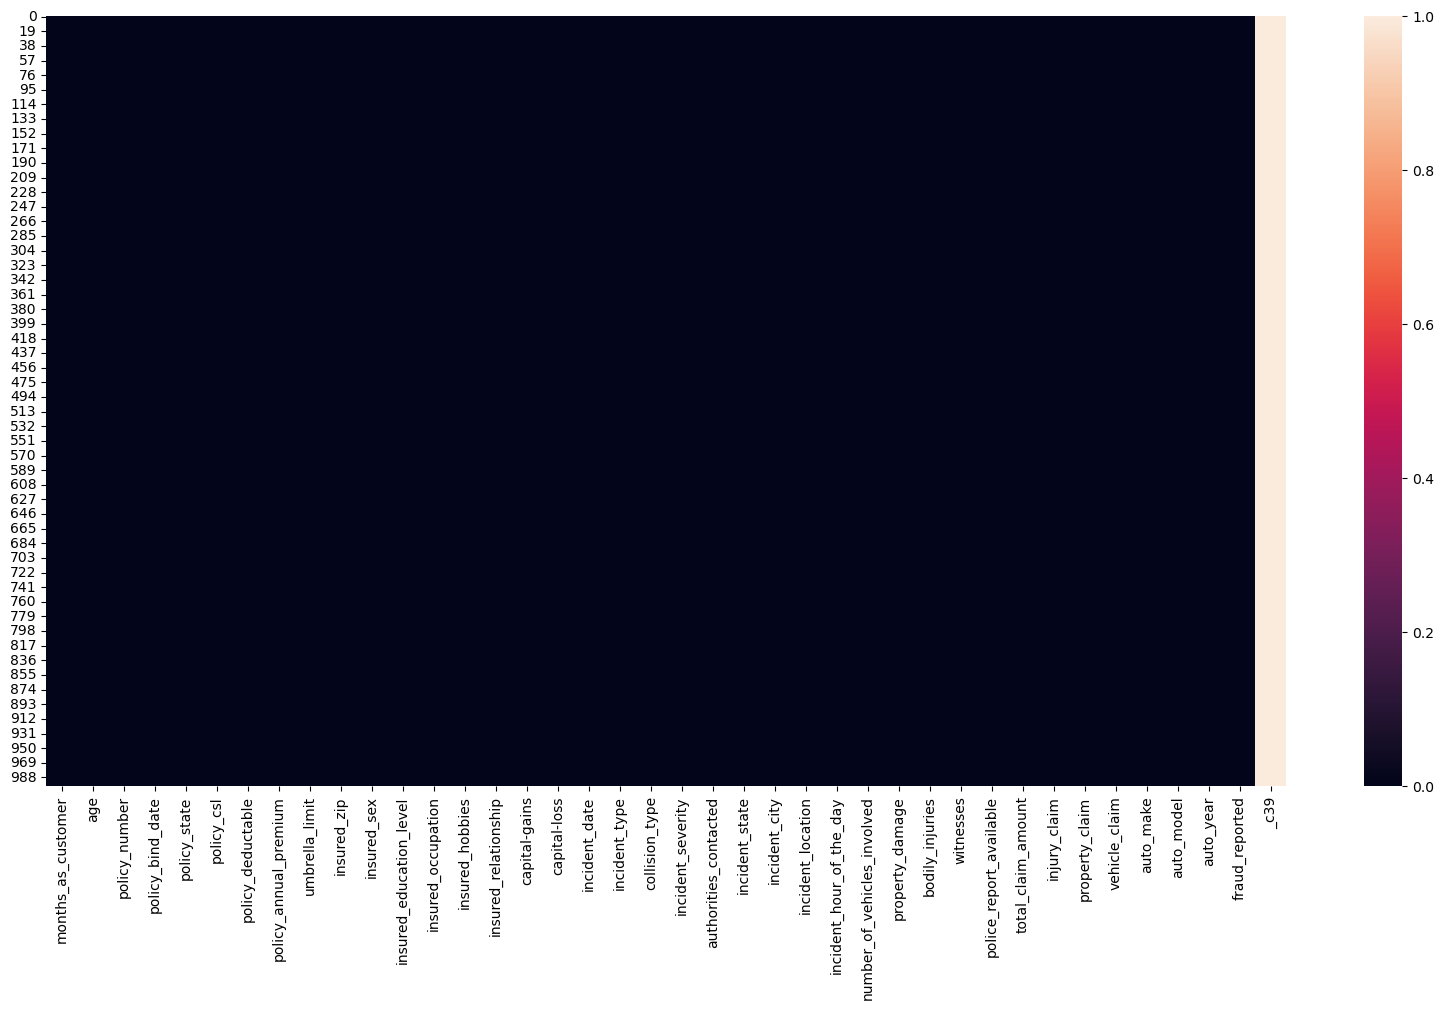

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

We can see that the c39 column have not any value so drop this columns

In [12]:
df.drop('_c39', axis = 1, inplace = True)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

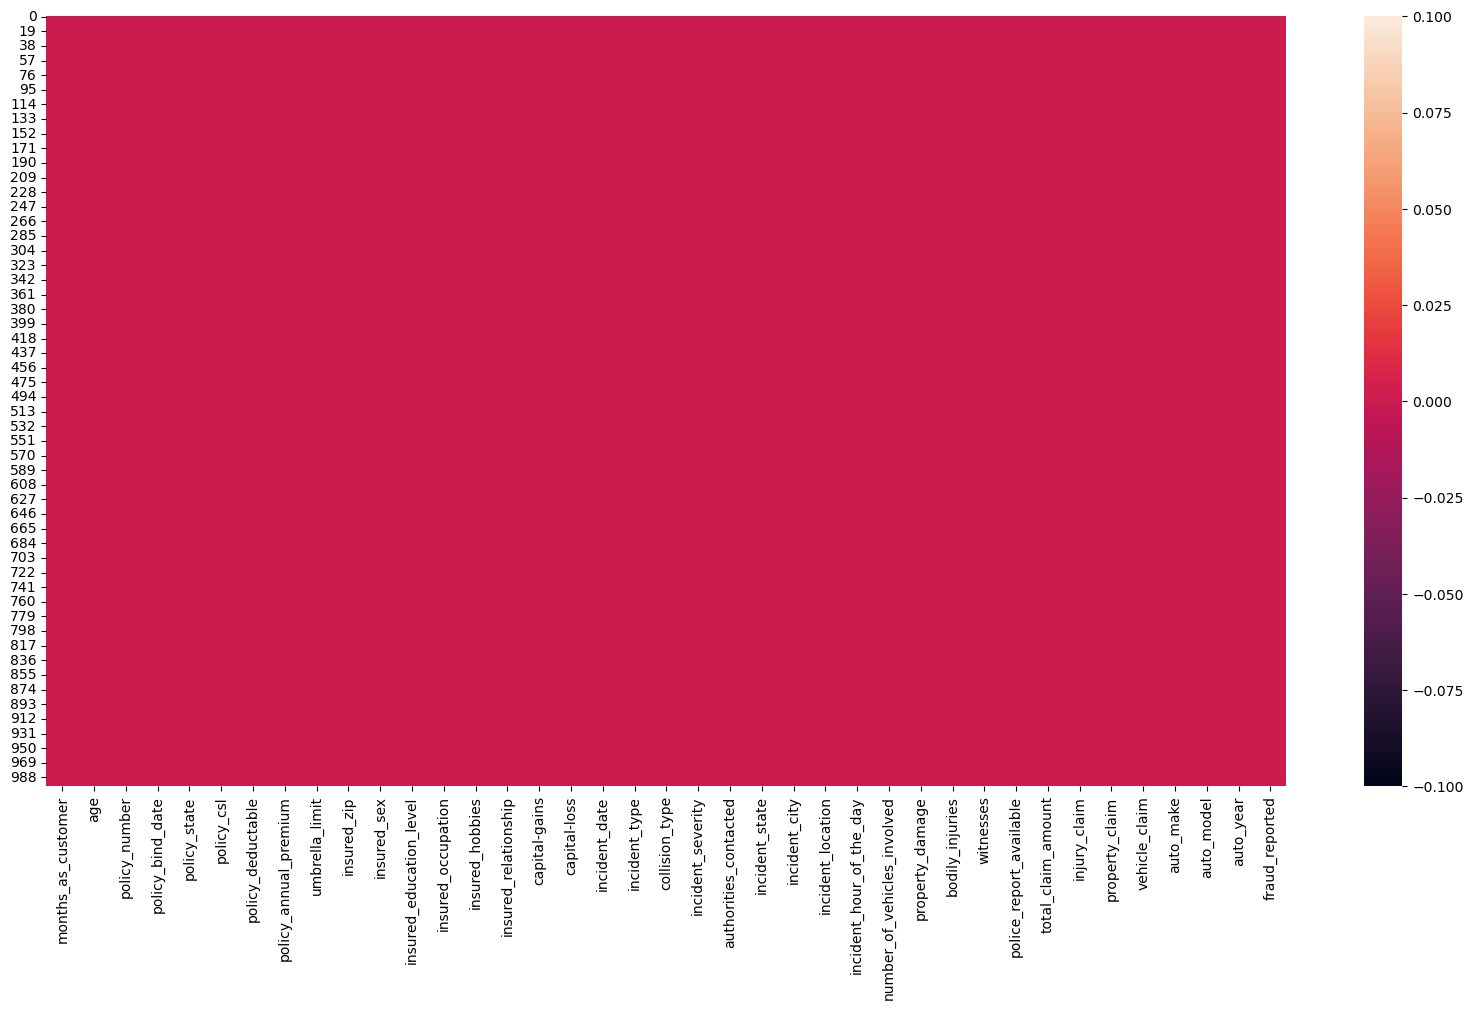

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

Great now there is not any null value 

In [14]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

<Axes: >

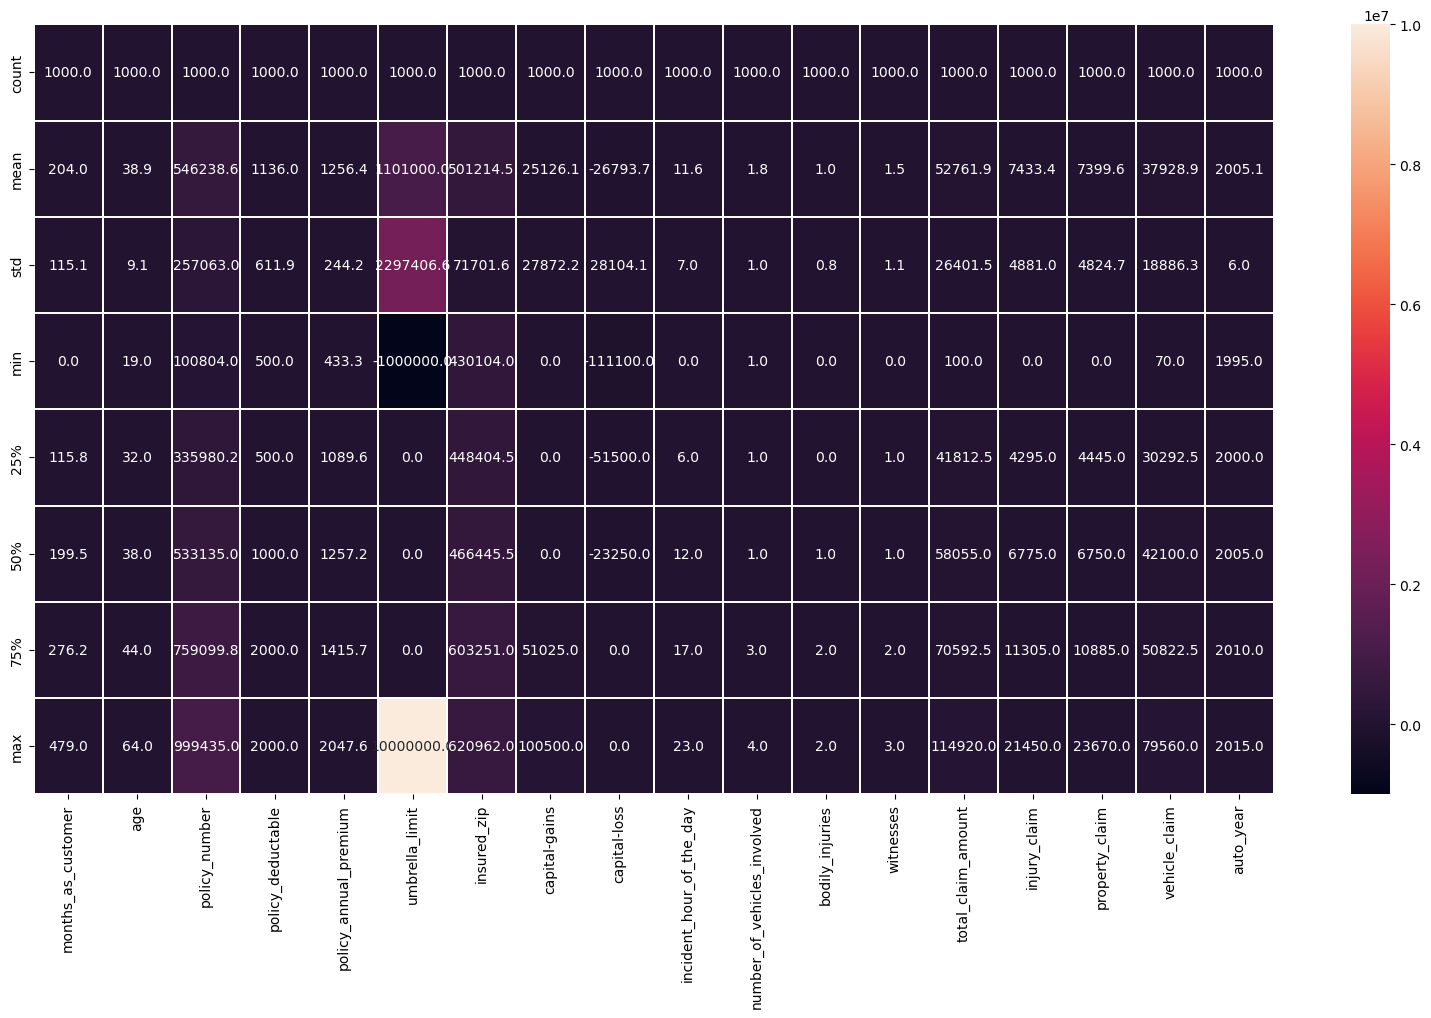

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [16]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [17]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [18]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year



df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [19]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [20]:
df.drop(['incident_year'],axis=1,inplace=True)


In [21]:
df['Automobile_Age']=2015 - df['auto_year']

df.drop("auto_year",axis=1,inplace=True)

In [22]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']


In [23]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

# Data Visualization

Text(0.5, 1.0, 'Fraud Reported Cases')

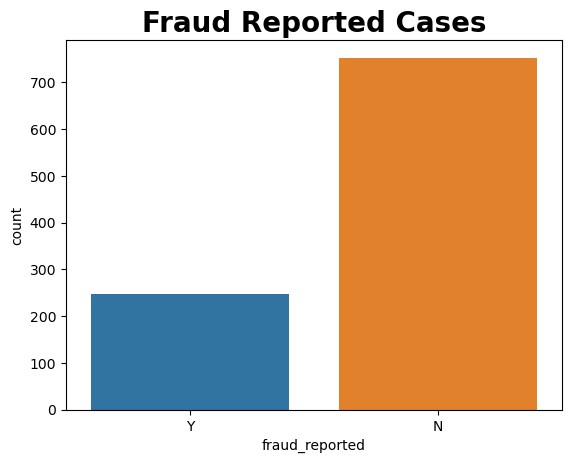

In [24]:
sns.countplot(x='fraud_reported',data=df)
plt.title('Fraud Reported Cases',fontsize=20,fontweight ='bold')


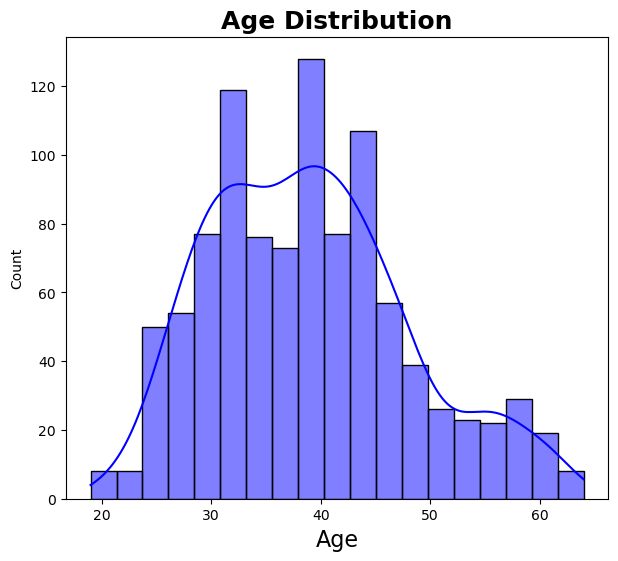

In [25]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

# Age VS Fraud Reported

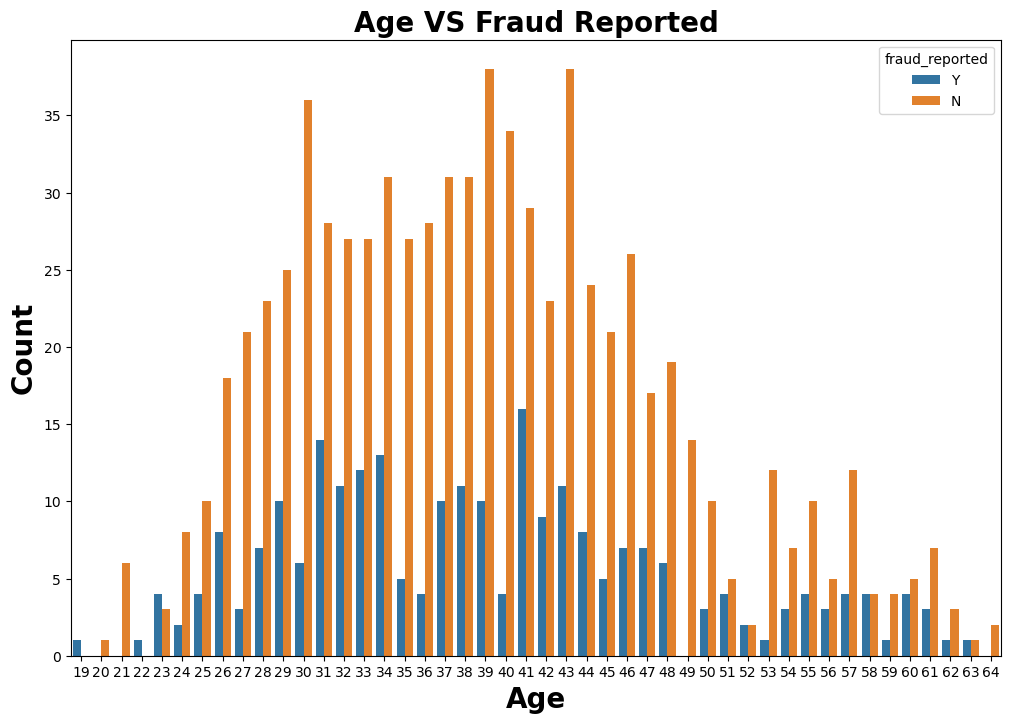

In [26]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='age',hue="fraud_reported",data=df)
plt.title('Age VS Fraud Reported',fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Policy state VS Fraud Reported

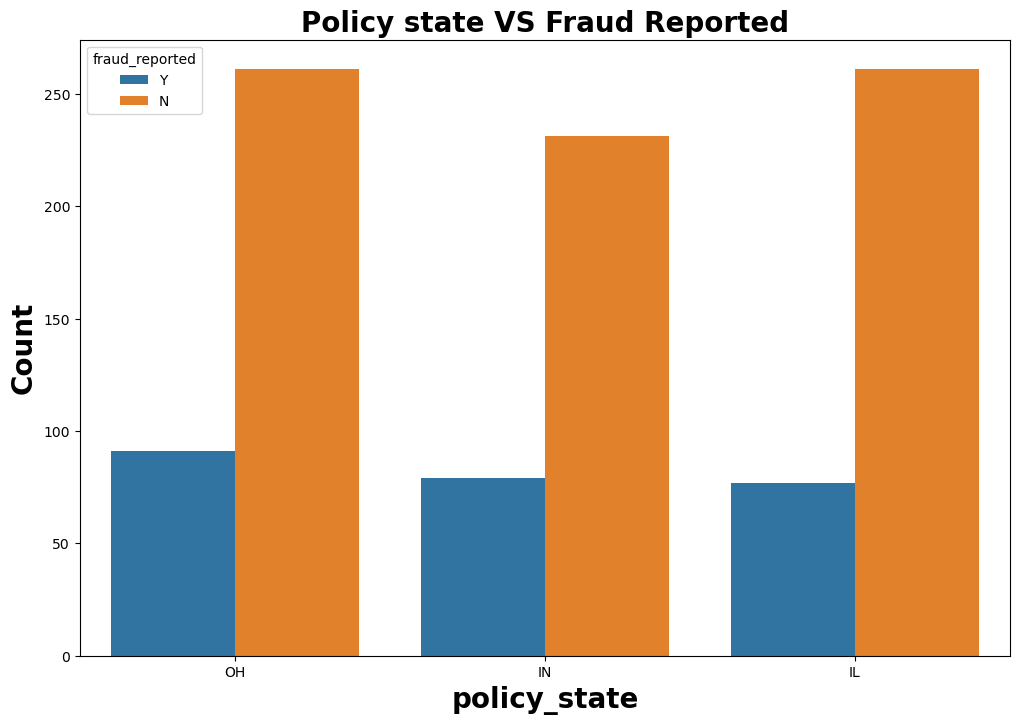

In [27]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='policy_state',hue="fraud_reported",data=df)
plt.title('Policy state VS Fraud Reported',fontsize=20,fontweight ='bold')
plt.xlabel('policy_state',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Insured_sex VS Fraud Reported

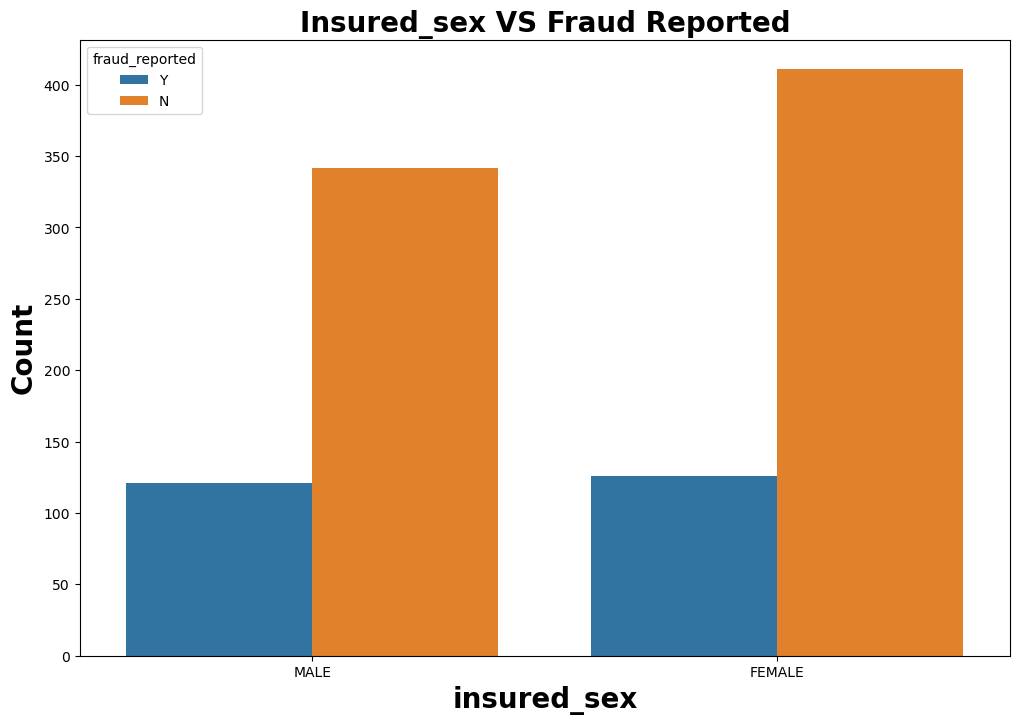

In [28]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='insured_sex',hue="fraud_reported",data=df)
plt.title('Insured_sex VS Fraud Reported',fontsize=20,fontweight ='bold')
plt.xlabel('insured_sex',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Education level VS Fraud Reported

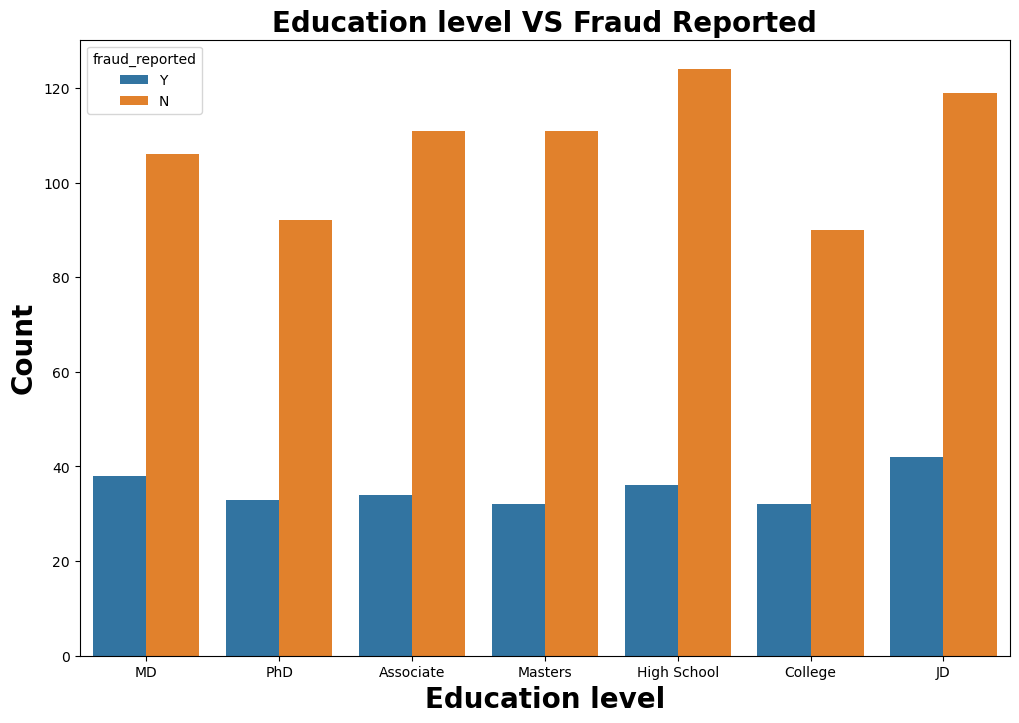

In [29]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='insured_education_level',hue="fraud_reported",data=df)
plt.title('Education level VS Fraud Reported',fontsize=20,fontweight ='bold')
plt.xlabel('Education level',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Occupation of Insured Customers

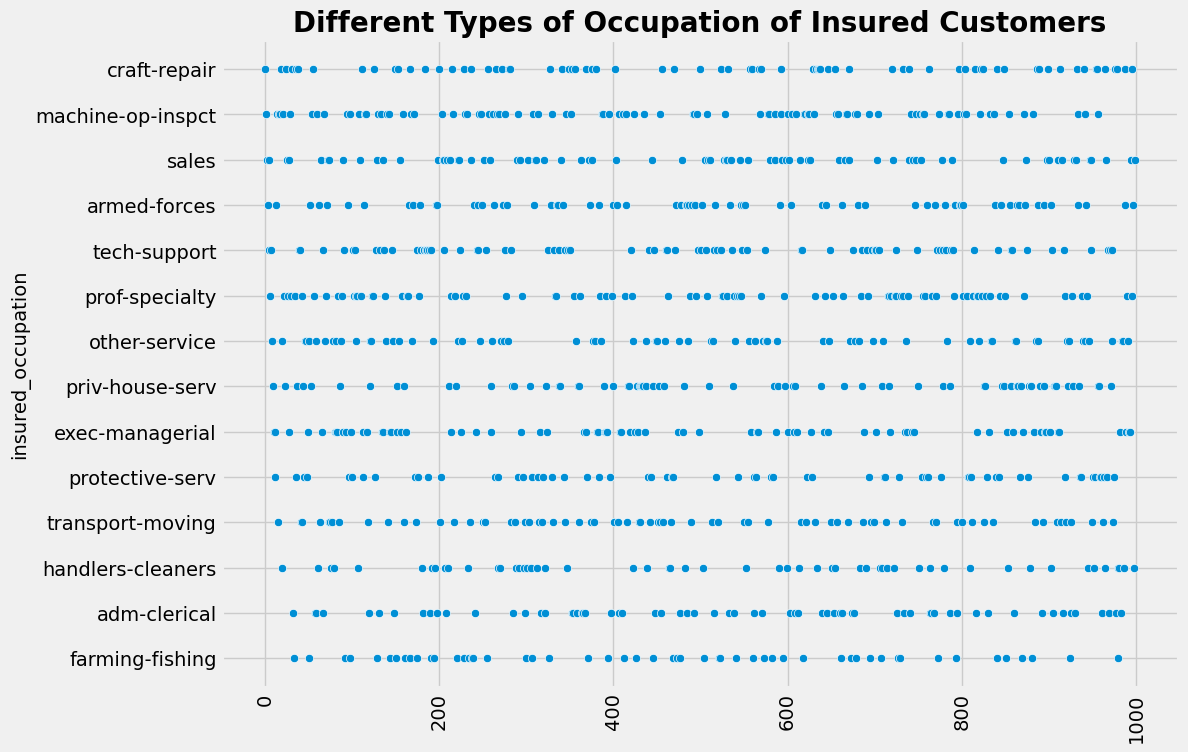

In [30]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.scatterplot(df['insured_occupation'])
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

# Hobbies of Insured Customers

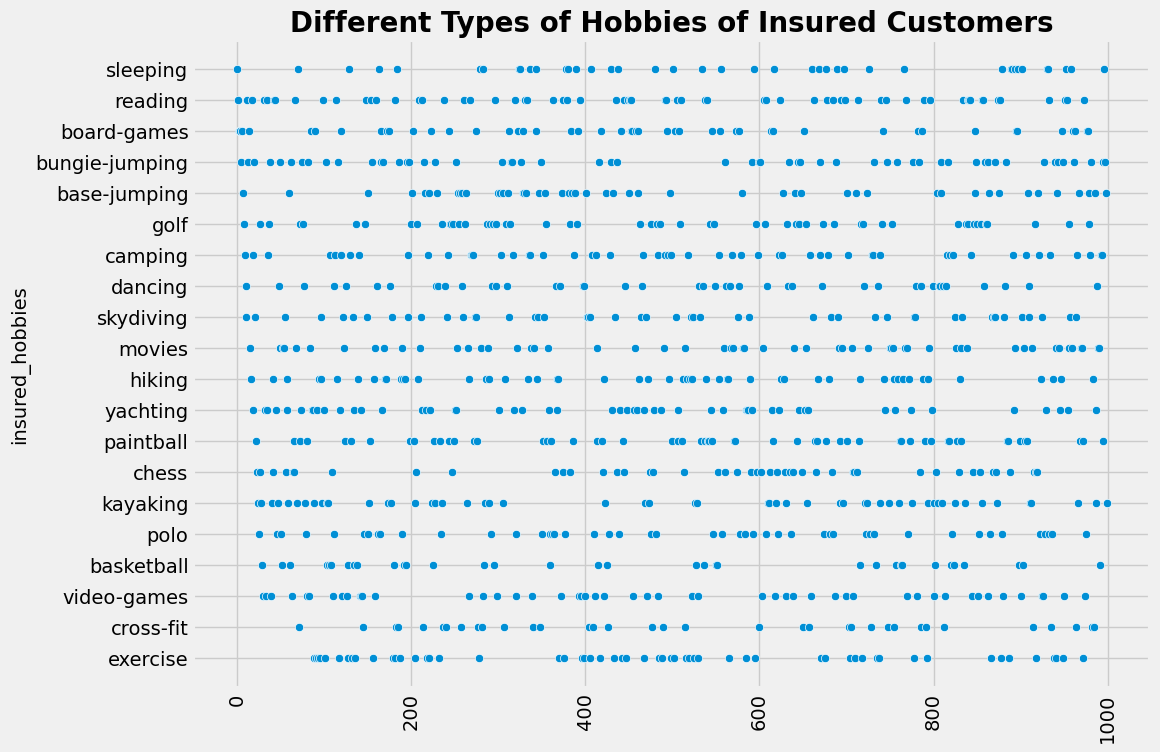

In [31]:
sns.scatterplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 


# Types of Incidents

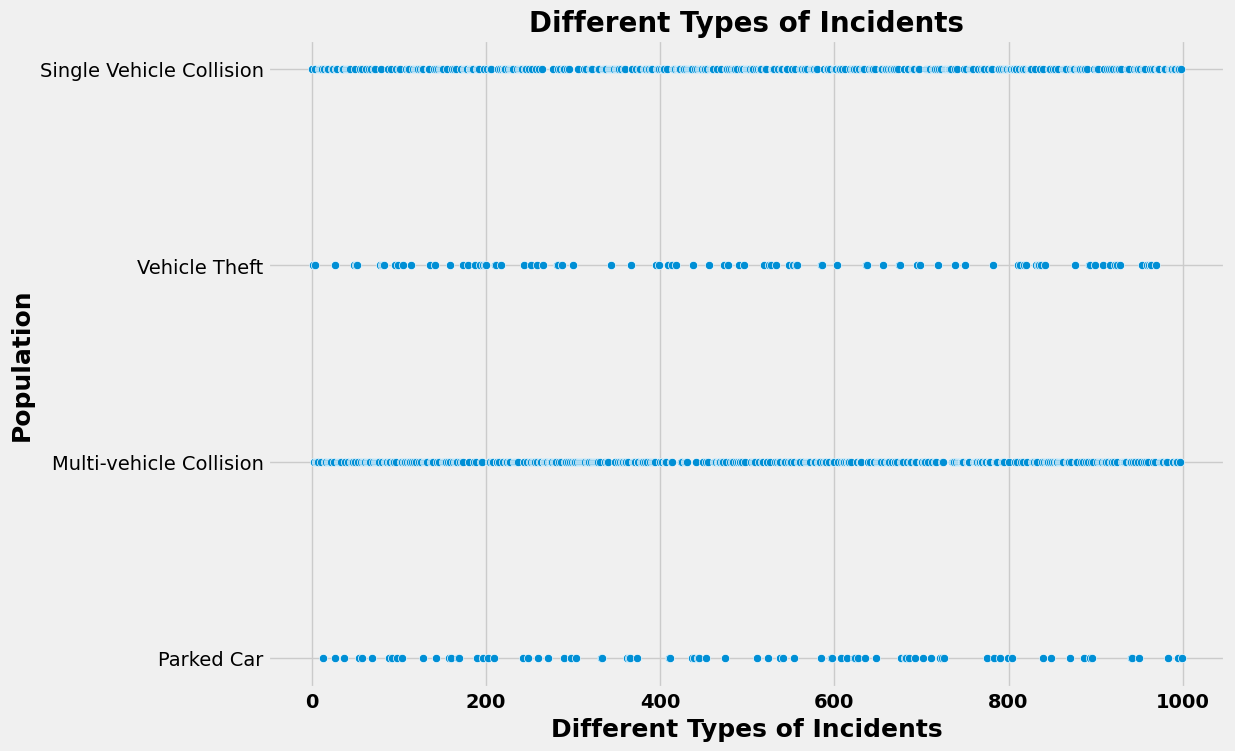

In [32]:
sns.scatterplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()


# Incident type VS Fraud Reported

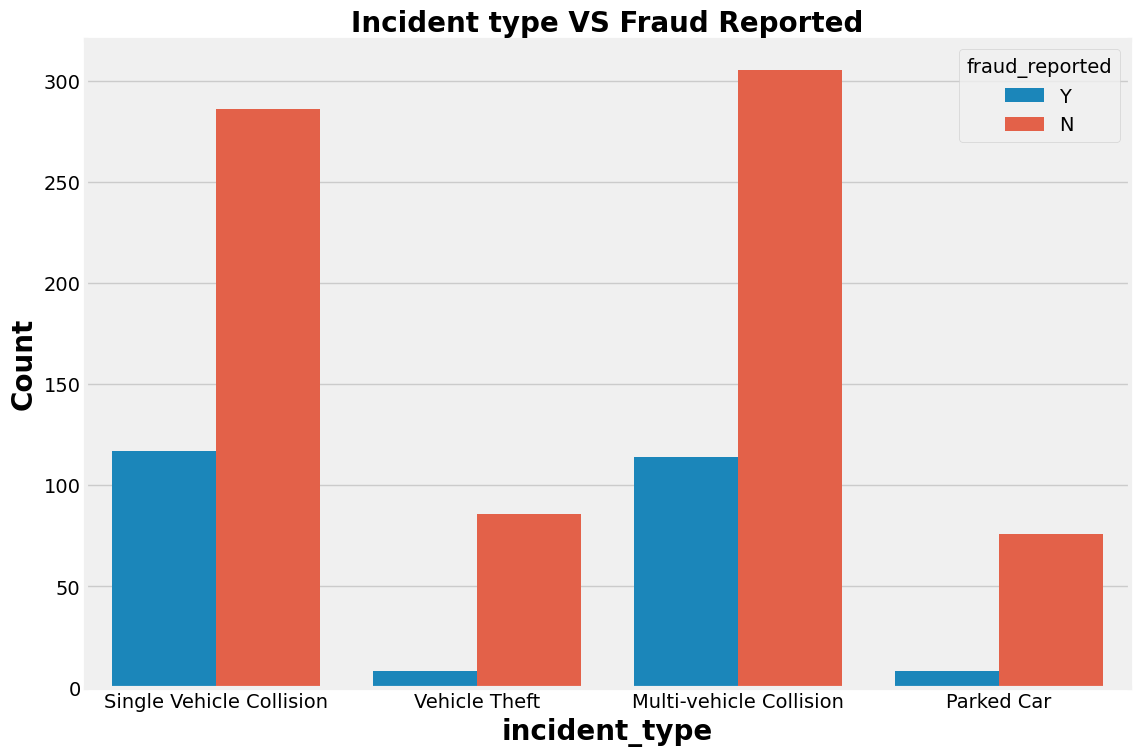

In [33]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='incident_type',hue="fraud_reported",data=df)
plt.title('Incident type VS Fraud Reported',fontsize=20,fontweight ='bold')
plt.xlabel('incident_type',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Collision Type VS Fraud Reported

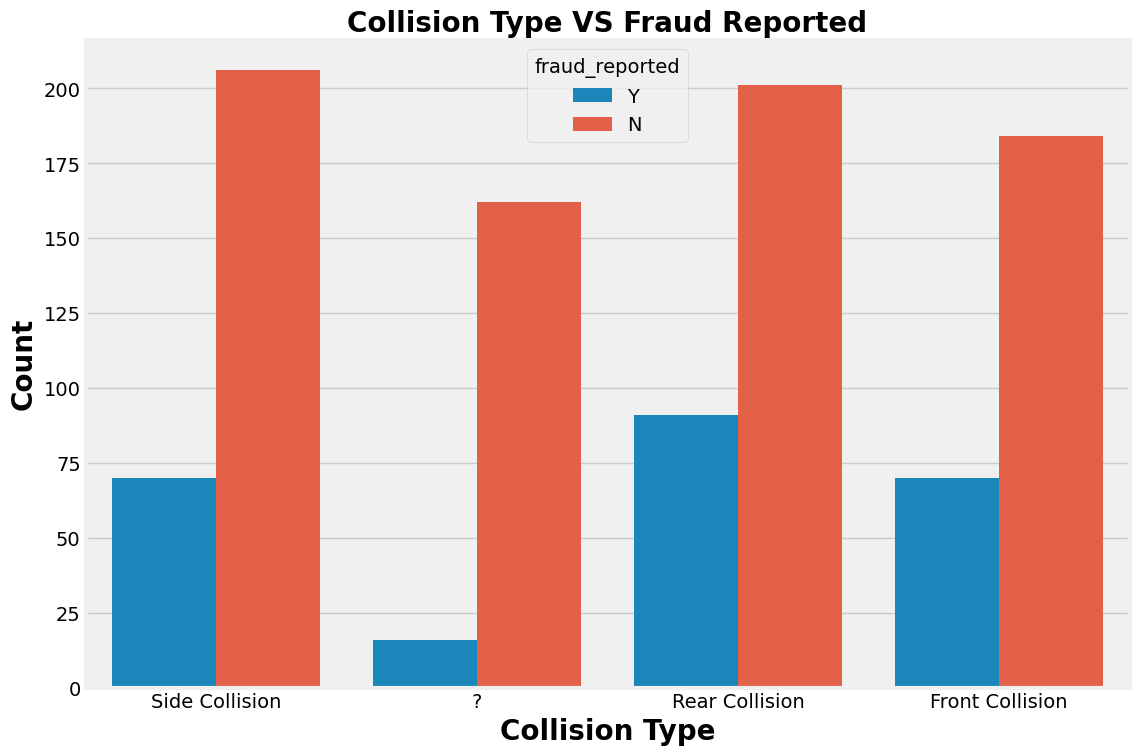

In [34]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='collision_type',hue="fraud_reported",data=df)
plt.title('Collision Type VS Fraud Reported',fontsize=20,fontweight ='bold')
plt.xlabel('Collision Type',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

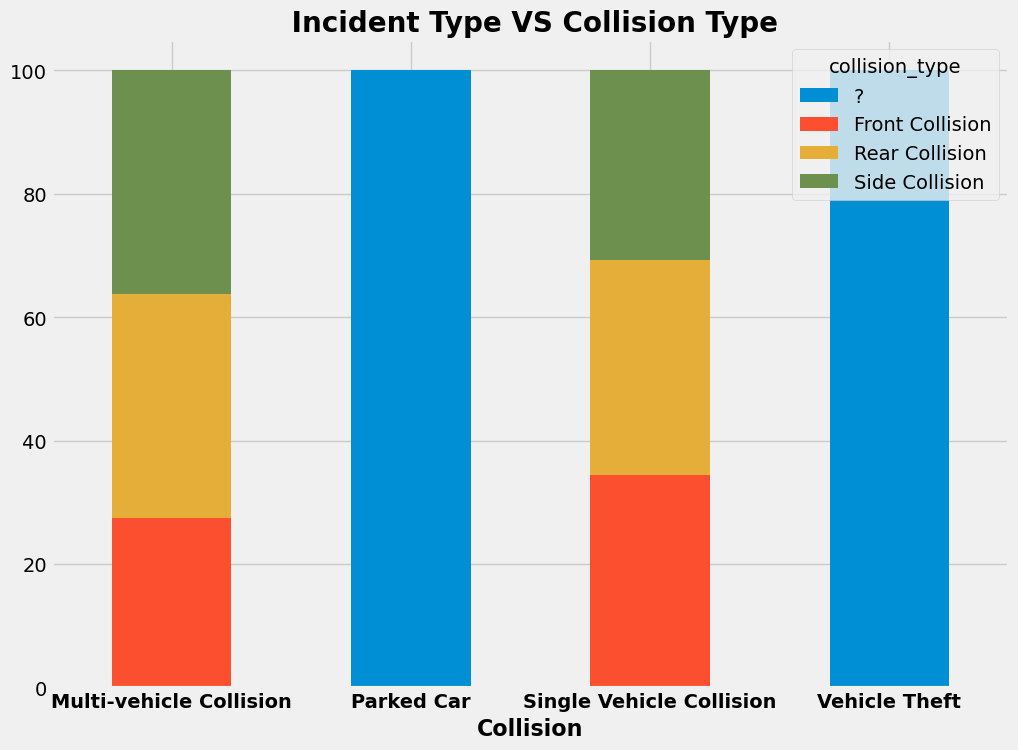

In [35]:
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

# Incedent Severity vs Collision type

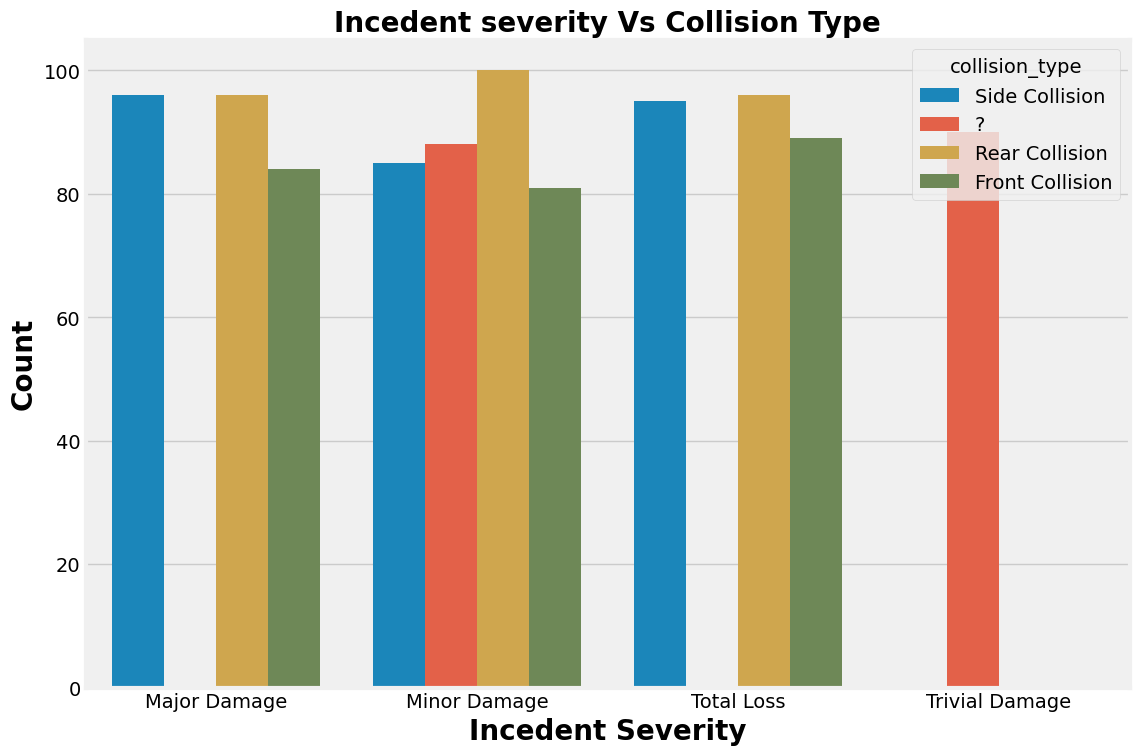

In [36]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='incident_severity',hue="collision_type",data=df)
plt.title('Incedent severity Vs Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Incedent Severity',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Incedent type Vs Incedent Severity

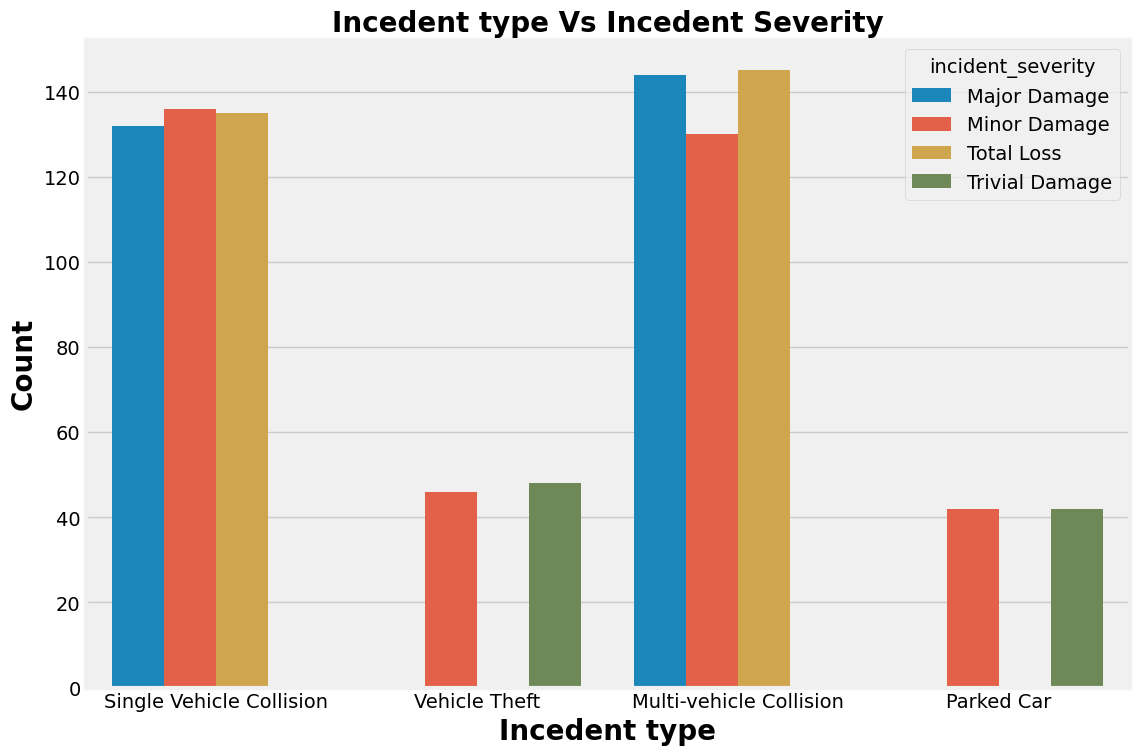

In [37]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='incident_type',hue="incident_severity",data=df)
plt.title('Incedent type Vs Incedent Severity',fontsize=20,fontweight ='bold')
plt.xlabel('Incedent type',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Encoding the Categorical data 

In [38]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported','incident_location', 'CSL_Personal', 'CSL_Accidental']

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head(10)

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                 328   48         521585             2               1000   
1                 228   42         342868             1               2000   
2                 134   29         687698             2               2000   
3                 256   41         227811             0               2000   
4                 228   44         367455             0               1000   
5                 256   39         104594             2               1000   
6                 137   34         413978             1               1000   
7                 165   37         429027             0               1000   
8                  27   33         485665             0                500   
9                 212   42         636550             0                500   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   
5                1351.10               0       478456            0   
6                1333.35               0       441716            1   
7                1137.03               0       603195            1   
8                1442.99               0       601734            0   
9                1315.68               0       600983            1   

   insured_education_level  ...  auto_model  fraud_reported  CSL_Personal  \
0                        4  ...           1               1             1   
1                        4  ...          12               1             1   
2                        6  ...          30               0             0   
3                        6  ...          34               1             1   
4                        0  ...          31               0             2   
5                        6  ...           3               1             1   
6                        6  ...          29               0             1   
7                        0  ...           5               0             0   
8                        6  ...           9               0             0   
9                        6  ...           1               0             0   

   CSL_Accidental  policy_bind_day  policy_bind_month  policy_bind_year  \
0               2               17                 10              2014   
1               2               27                  6              2006   
2               1                9                  6              2000   
3               2               25                  5              1990   
4               0                6                  6              2014   
5               2               10                 12              2006   
6               2                6                  4              2000   
7               1                2                  3              1990   
8               1                2                  5              1997   
9               1               25                  7              2011   

   incident_day  incident_month  Automobile_Age  
0            25               1              11  
1            21               1               8  
2            22               2               8  
3             1              10               1  
4            17               2               6  
5             1               2              12  
6            13               1               3  
7            27               2               0  
8            30               1               3  
9             1               5              19  

[10 rows x 43 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

# Feature Selection and Engineering 

# Outliers Detection and Removal

In [41]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']
len(Numerical)

21

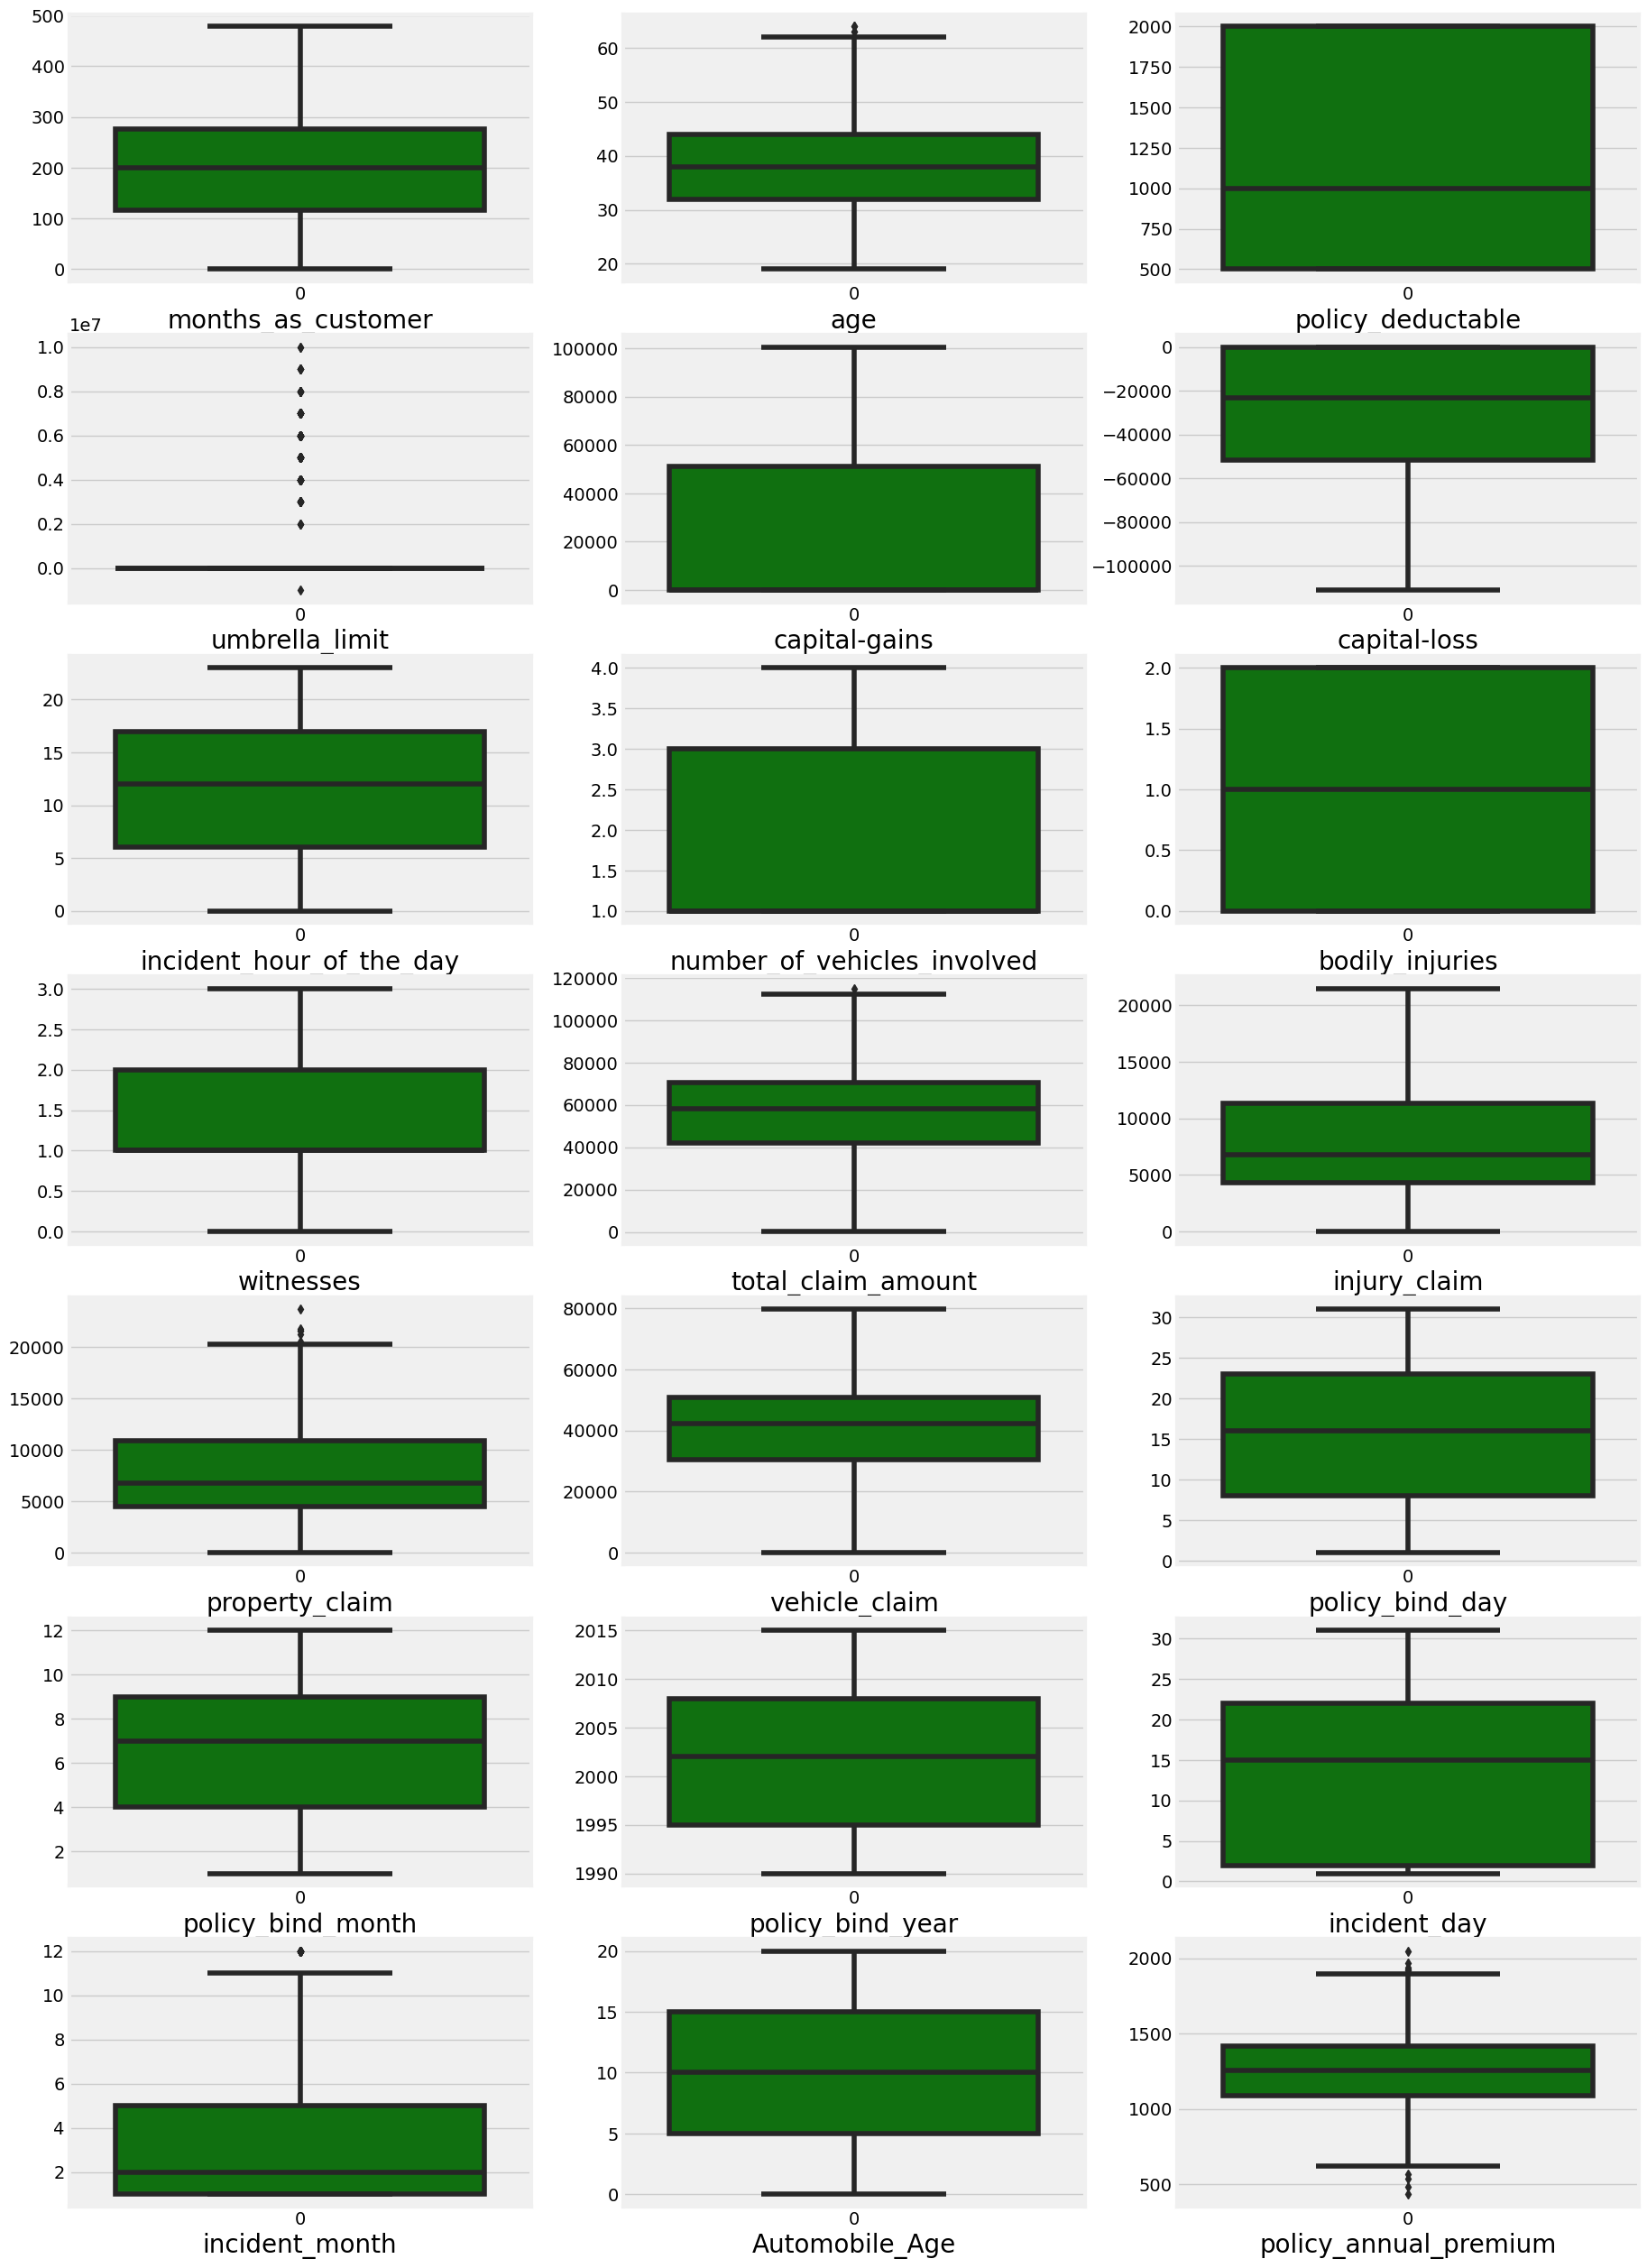

In [42]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 43)
Shape of the dataframe after removing outliers:  (980, 43)
Percentage of data loss post outlier removal:  2.0


# Checking for the Skewness

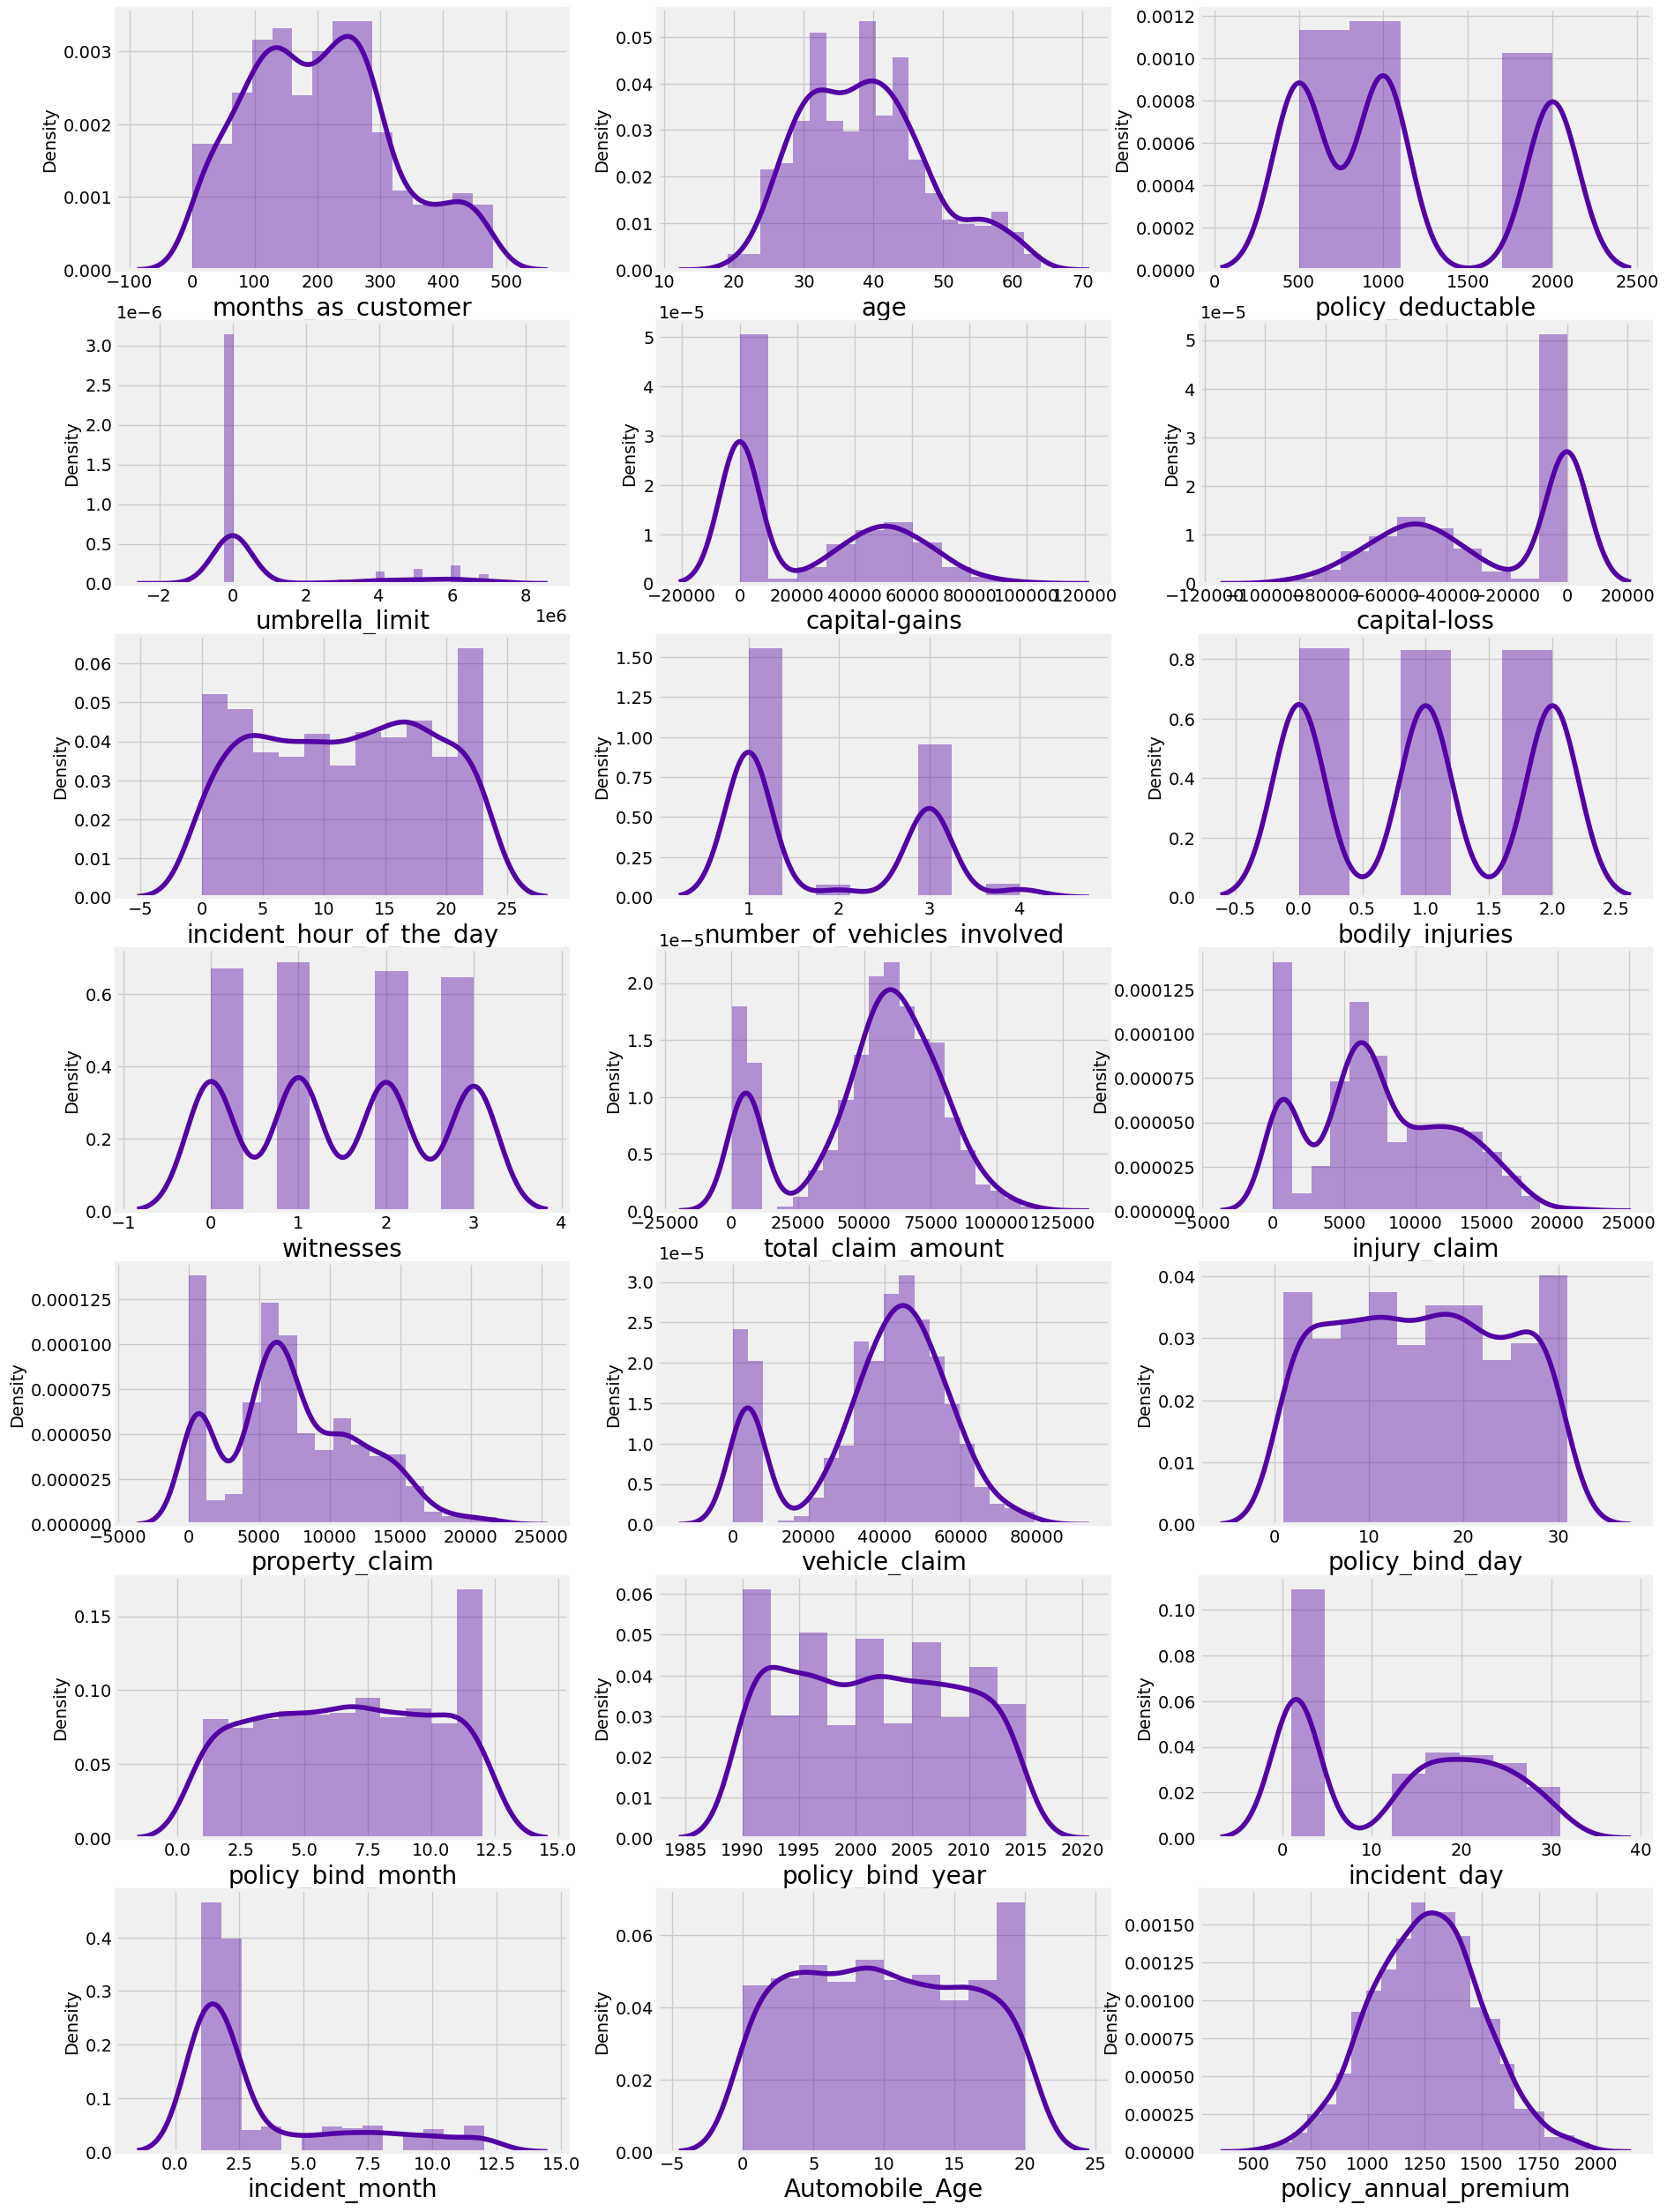

In [44]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [45]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196


# Now we can check the skewness of the data is all right

# Checking for Correlation

In [46]:
df.corr()


months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922960       0.061267   
age                                    0.922960  1.000000       0.062332   
policy_number                          0.061267  0.062332       1.000000   
policy_state                          -0.007183 -0.020012       0.071343   
policy_deductable                      0.031041  0.032036      -0.009812   
policy_annual_premium                 -0.003814  0.005330       0.028686   
umbrella_limit                         0.018213  0.013256      -0.000145   
insured_zip                            0.029572  0.035864       0.004531   
insured_sex                            0.059644  0.073790       0.007069   
insured_education_level               -0.000731  0.001647      -0.033767   
insured_occupation                     0.006925  0.014798      -0.014476   
insured_hobbies                       -0.089358 -0.079099       0.031887   
insured_relationship                   0.071492  0.076129       0.021378   
capital-gains                          0.007468 -0.004529       0.013628   
capital-loss                           0.023041  0.012860      -0.005587   
incident_type                         -0.016746 -0.026286       0.007872   
collision_type                        -0.023069 -0.022674      -0.009819   
incident_severity                     -0.064094 -0.064396      -0.016051   
authorities_contacted                  0.013782  0.018441       0.021092   
incident_state                         0.015811  0.012644      -0.014040   
incident_city                         -0.006601 -0.006685      -0.026174   
incident_location                     -0.011966 -0.009067       0.015872   
incident_hour_of_the_day               0.066198  0.083720      -0.000897   
number_of_vehicles_involved            0.011831  0.020391       0.007744   
property_damage                        0.002374 -0.006900       0.001889   
bodily_injuries                       -0.007674 -0.012254      -0.006242   
witnesses                              0.063574  0.056360      -0.005587   
police_report_available                0.024521  0.019424       0.029478   
total_claim_amount                     0.058761  0.067812      -0.016199   
injury_claim                           0.065062  0.077149      -0.006386   
property_claim                         0.036660  0.062375      -0.011147   
vehicle_claim                          0.055941  0.058918      -0.018152   
auto_make                              0.049734  0.033757       0.016494   
auto_model                             0.005130  0.015322       0.064599   
fraud_reported                         0.021285  0.013279      -0.036887   
CSL_Personal                          -0.021855 -0.013323       0.042129   
CSL_Accidental                         0.007121  0.011258       0.046745   
policy_bind_day                        0.050824  0.053147       0.052670   
policy_bind_month                      0.004207  0.014492       0.001913   
policy_bind_year                      -0.041914 -0.031709      -0.041632   
incident_day                          -0.010538 -0.005843       0.050839   
incident_month                         0.019242  0.018221      -0.042345   
Automobile_Age                        -0.000869 -0.005594       0.005574   

                             policy_state  policy_deductable  \
months_as_customer              -0.007183           0.031041   
age                             -0.020012           0.032036   
policy_number                    0.071343          -0.009812   
policy_state                     1.000000           0.017612   
policy_deductable                0.017612           1.000000   
policy_annual_premium            0.015089          -0.008300   
umbrella_limit                  -0.010921           0.013471   
insured_zip                      0.020669          -0.004399   
insured_sex                     -0.018002          -0.006977   
insured_education_level         -0.027173   

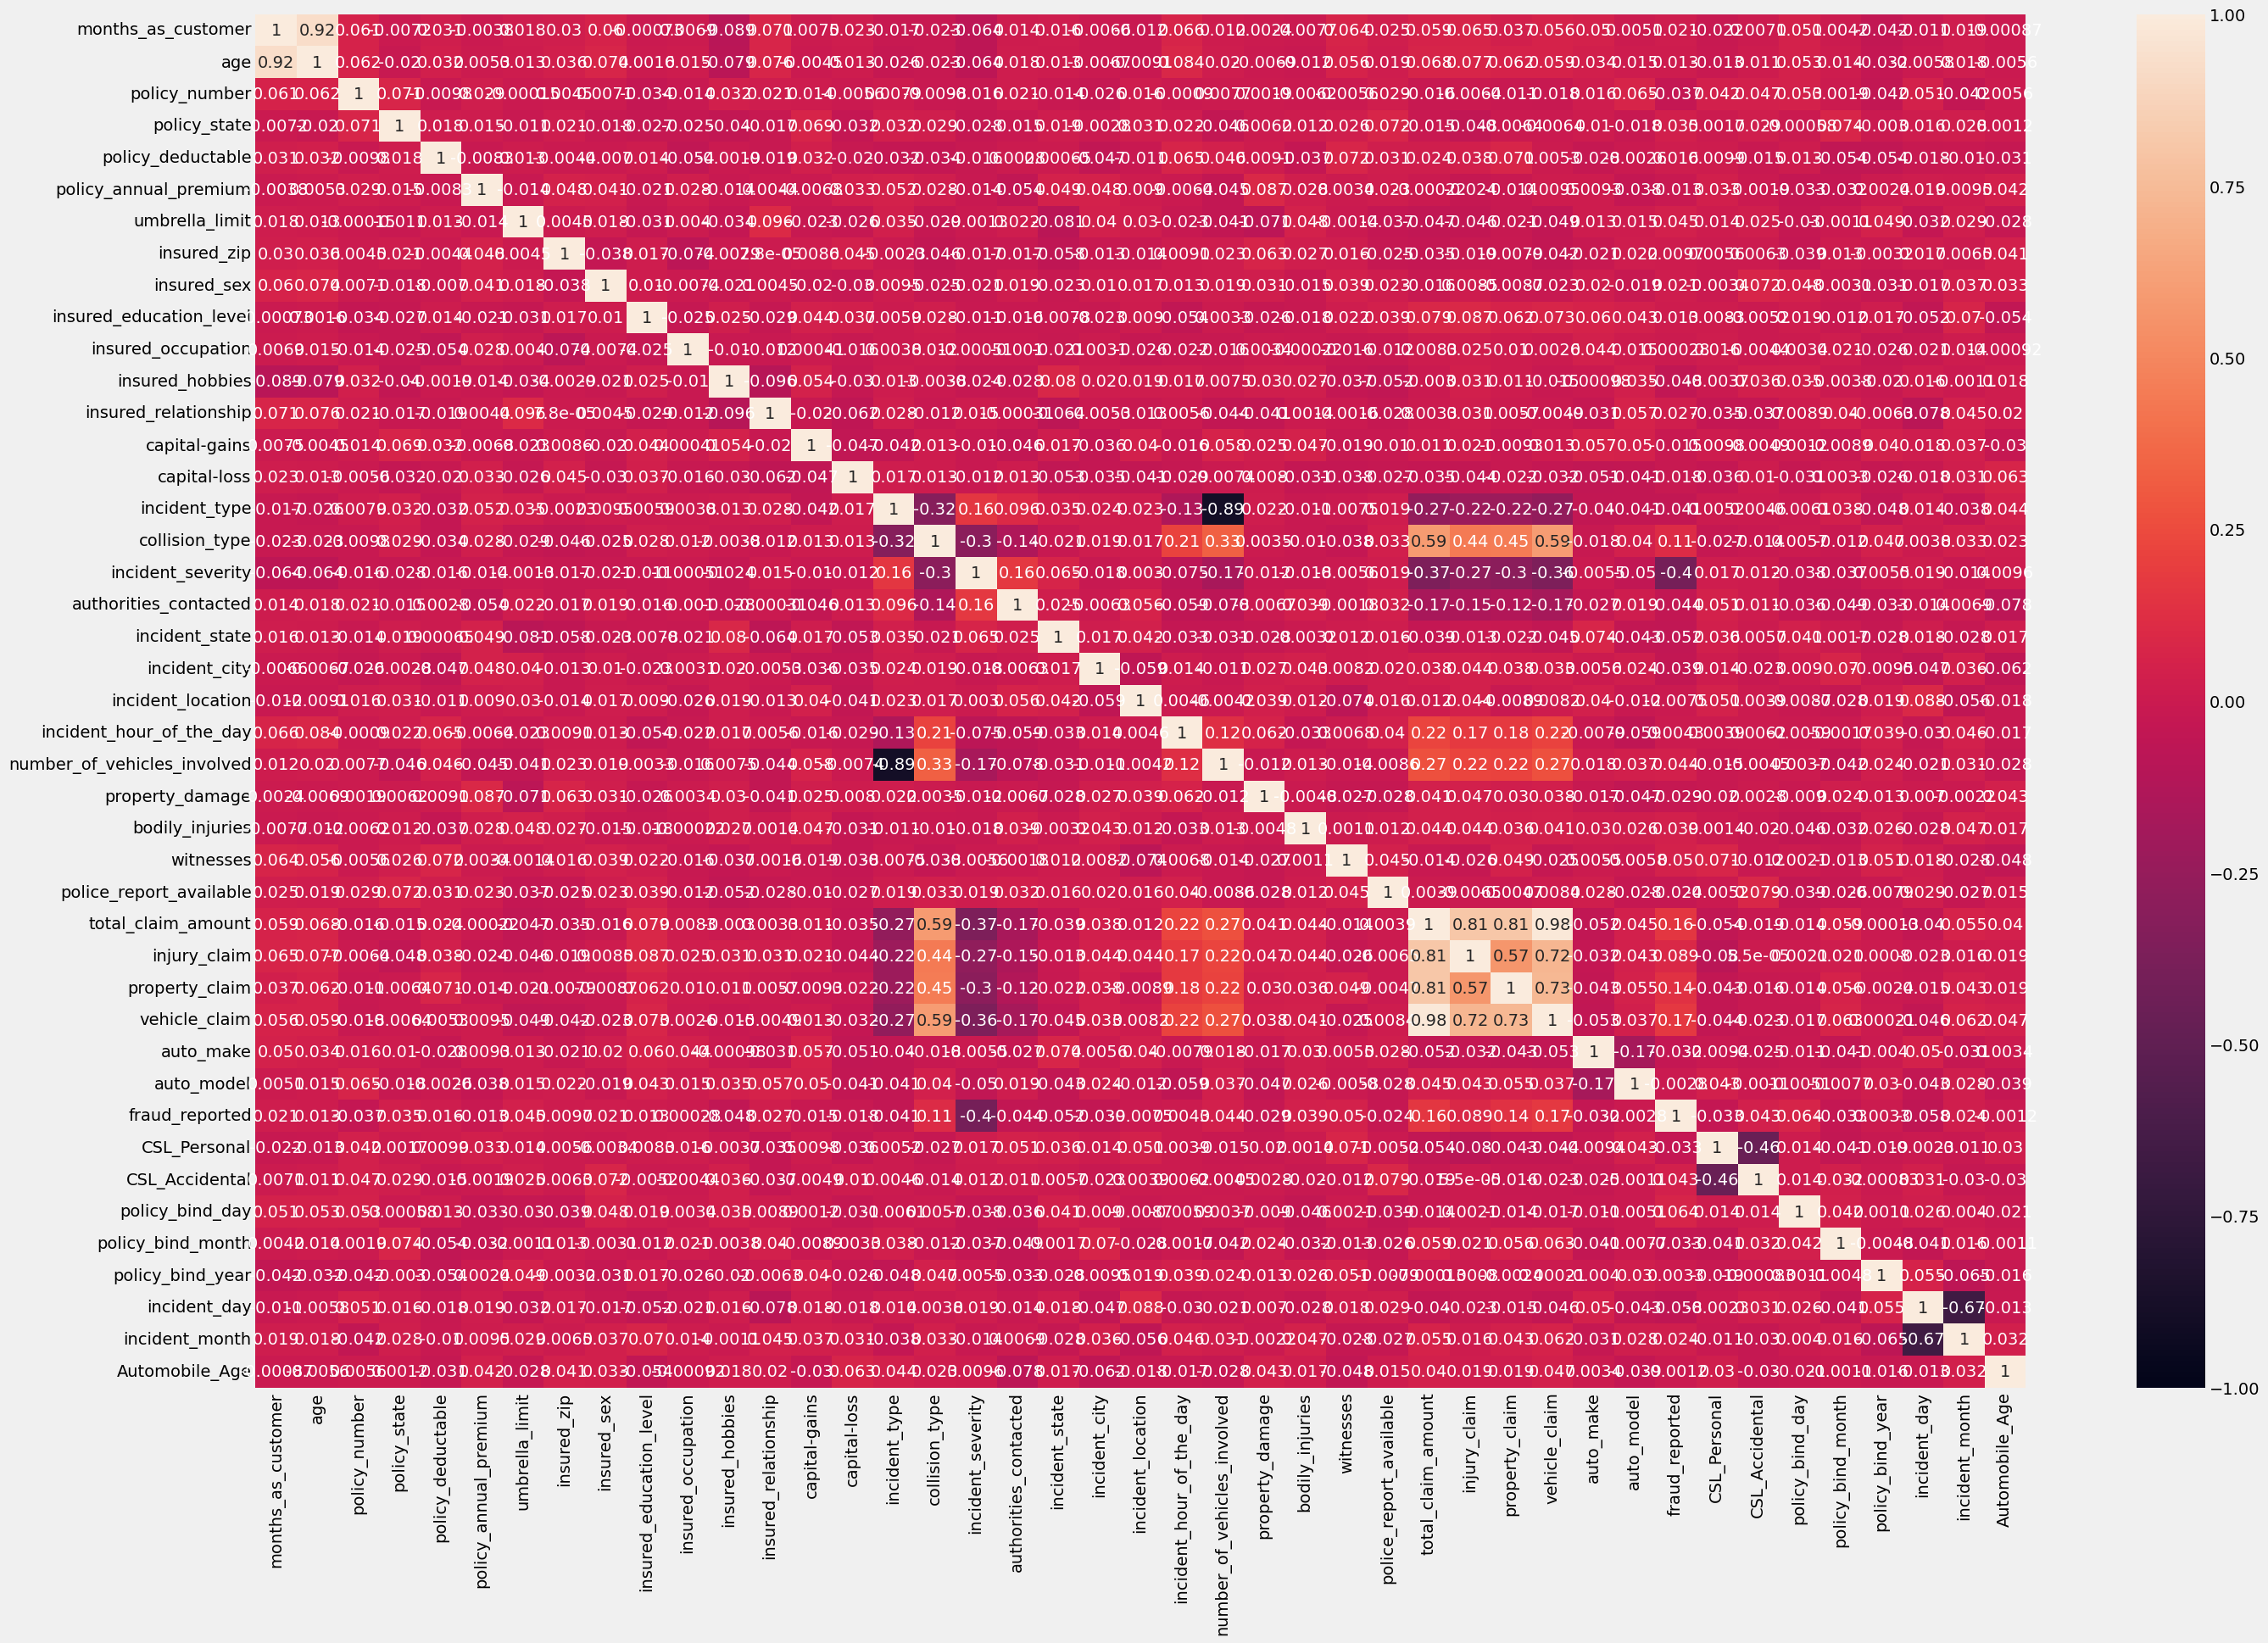

In [47]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True )
plt.show()

# Balanciing the Data using Smote function

In [48]:
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
x = df.drop(['fraud_reported'], axis =1)
y = df['fraud_reported']

In [49]:
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

In [50]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Standard Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x = scaler.fit_transform(x)

# Building the Machine Learning Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.metrics import plot_roc_curve

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (1036, 42)
Training target vector size: (1036,)
Test feature matrix size: (444, 42)
Test target vector size: (444,)


# Finding the Best Random State

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8581081081081081 on Random_state 86


# Logistic Regression 

In [55]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.8484555984555985


Classification ML Algorithm Evaluation Matrix for Logistic Regression is


Accuracy Score : 0.7995495495495496


Confusion matrix :
 [[175  47]
 [ 42 180]]


Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       222
           1       0.79      0.81      0.80       222

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444





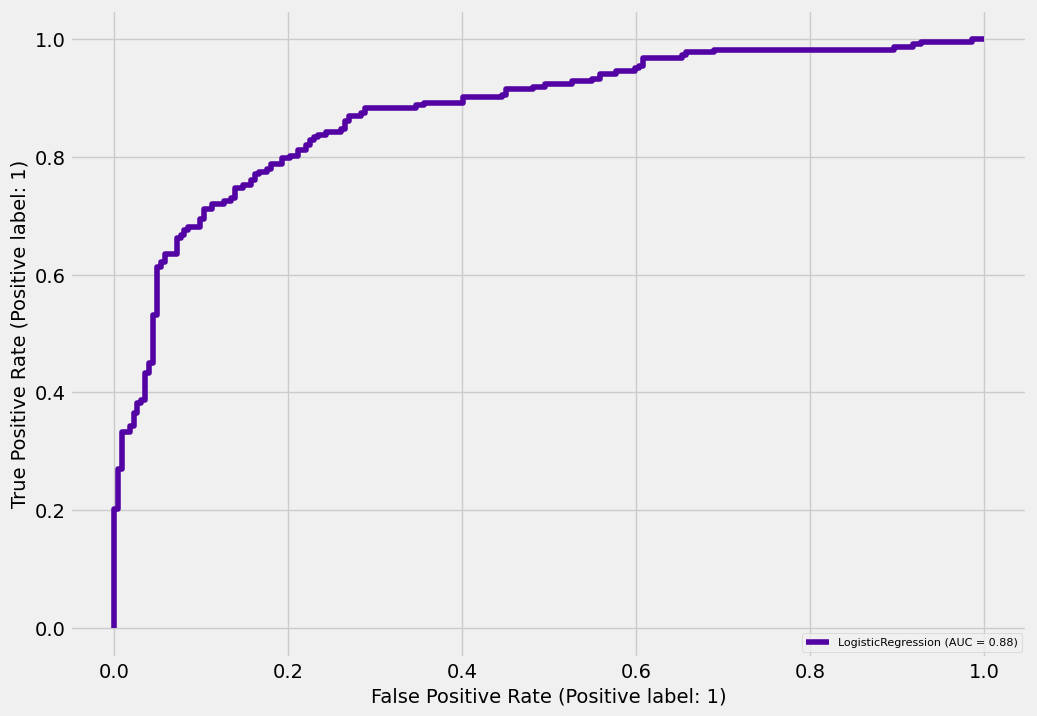

In [56]:
print('Classification ML Algorithm Evaluation Matrix for Logistic Regression is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(LR,x_test,y_test)   
plt.legend(prop={'size':8}, loc='lower right')
plt.show()

# SVC Model

Classification ML Algorithm Evaluation Matrix SVC Model is


Accuracy Score : 0.8333333333333334


Confusion matrix :
 [[190  32]
 [ 42 180]]


Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       222
           1       0.85      0.81      0.83       222

    accuracy                           0.83       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.83      0.83      0.83       444





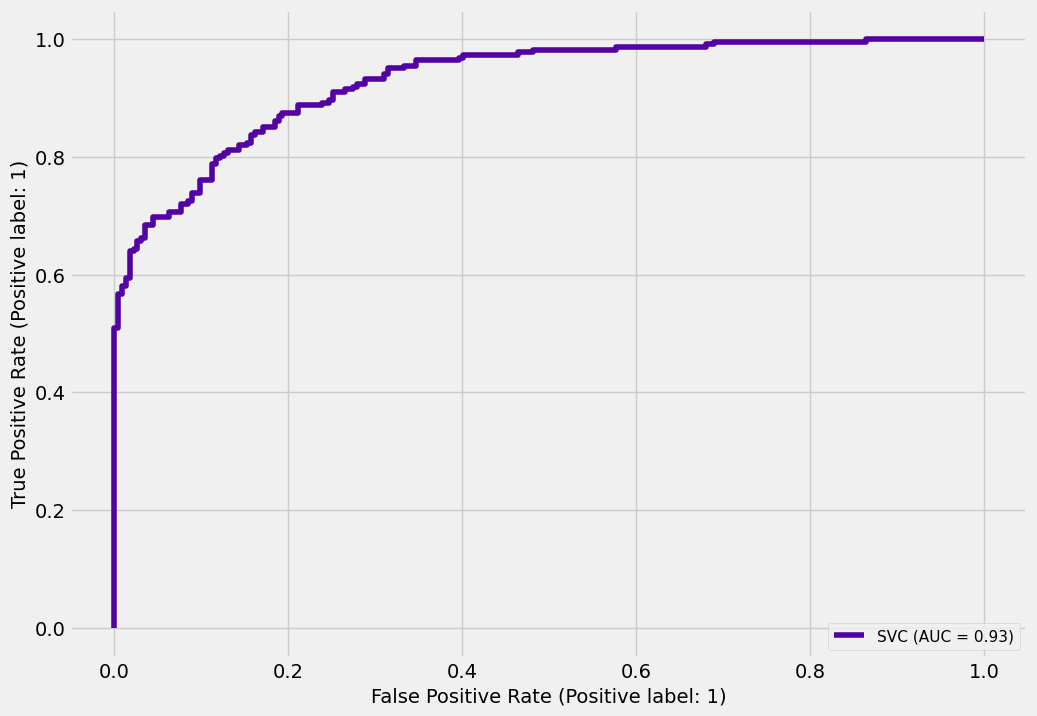

In [57]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix SVC Model is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(svc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# By Using  gaussianNB Model

Classification ML Algorithm Evaluation Matrix for GaussianNB is


Accuracy Score : 0.759009009009009


Confusion matrix :
 [[158  64]
 [ 43 179]]


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       222
           1       0.74      0.81      0.77       222

    accuracy                           0.76       444
   macro avg       0.76      0.76      0.76       444
weighted avg       0.76      0.76      0.76       444





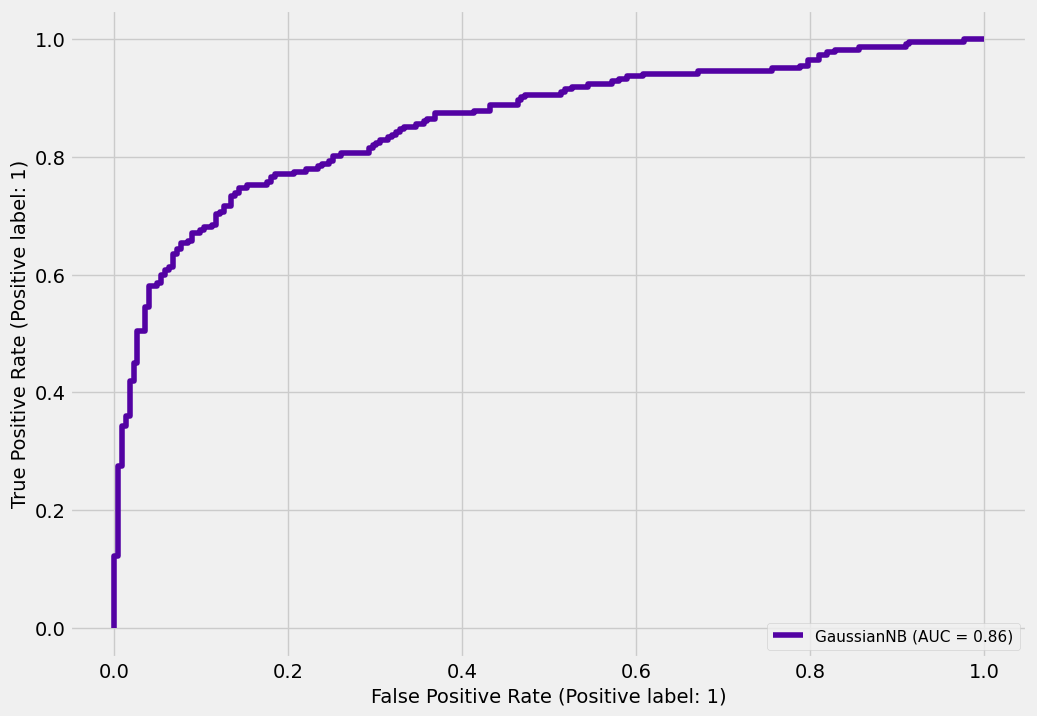

In [58]:
GNB =GaussianNB()
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for GaussianNB is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(GNB,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# By Using Decision Tree Classifier

Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is


Accuracy Score : 0.8130630630630631


Confusion matrix :
 [[175  47]
 [ 36 186]]


Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       222
           1       0.80      0.84      0.82       222

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444





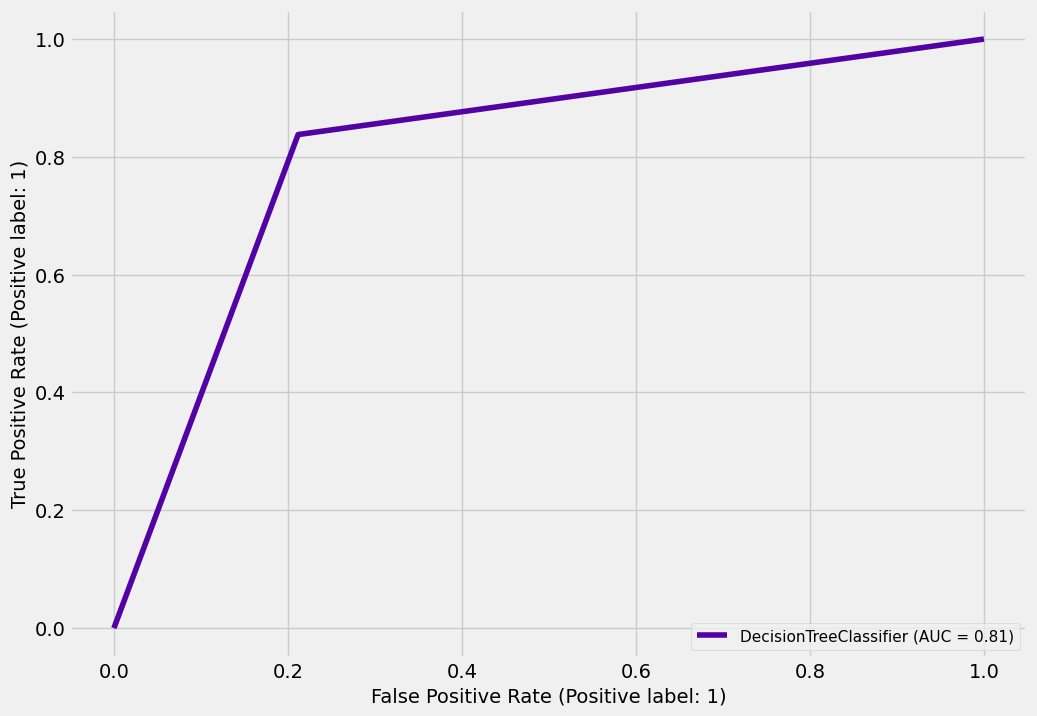

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(dtc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# By Using KNeighbors Classifier Model

Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is


Accuracy Score : 0.7004504504504504


Confusion matrix :
 [[ 94 128]
 [  5 217]]


Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.42      0.59       222
           1       0.63      0.98      0.77       222

    accuracy                           0.70       444
   macro avg       0.79      0.70      0.68       444
weighted avg       0.79      0.70      0.68       444





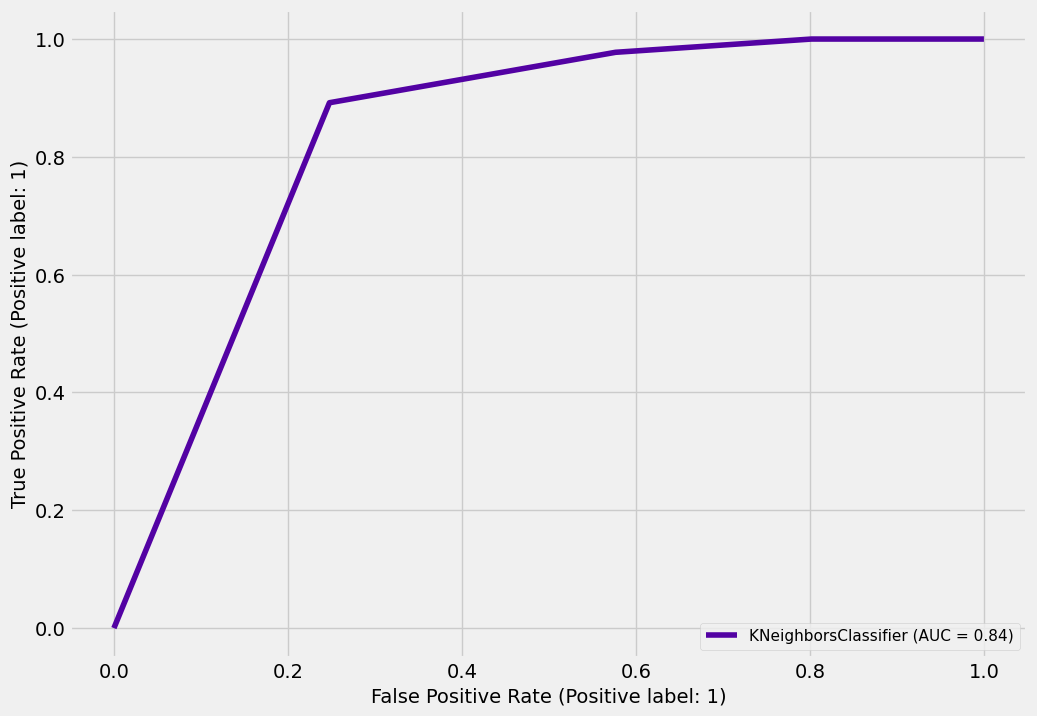

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(knn,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# By using Random Forest Classifier 

Classification ML Algorithm Evaluation Matrix RandomForestClassifier is


Accuracy Score : 0.8603603603603603


Confusion matrix :
 [[189  33]
 [ 29 193]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       222
           1       0.85      0.87      0.86       222

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444





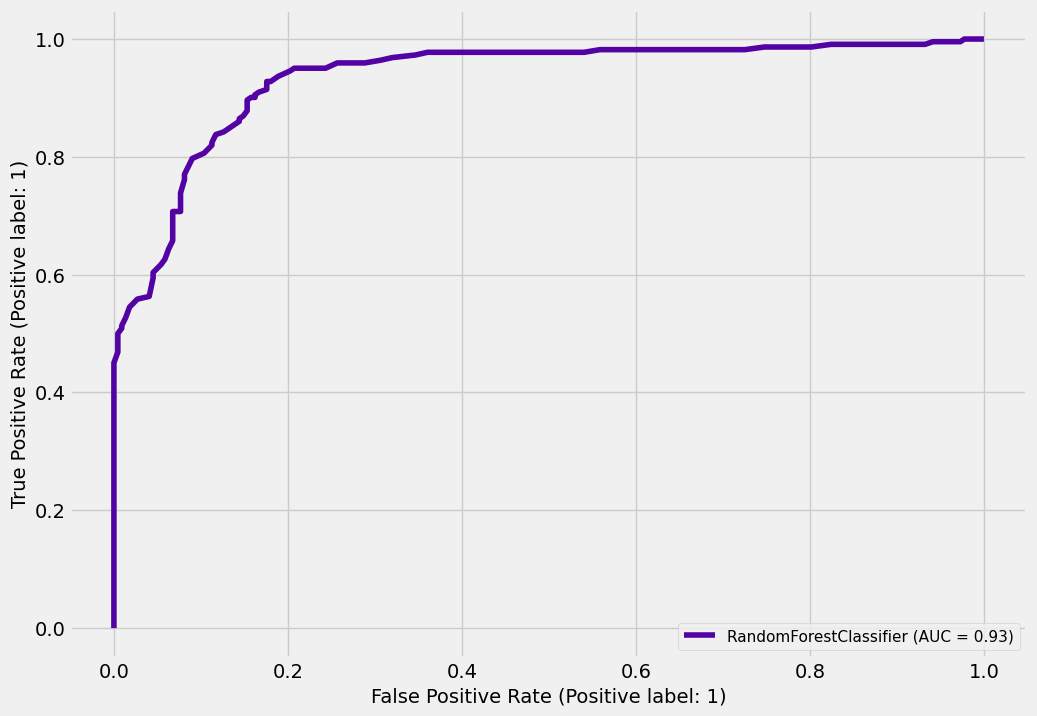

In [61]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix RandomForestClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(rfc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# By Using Extra Tree classifier 

Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is


Accuracy Score : 0.8626126126126126


Confusion matrix :
 [[187  35]
 [ 26 196]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       222
           1       0.85      0.88      0.87       222

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444





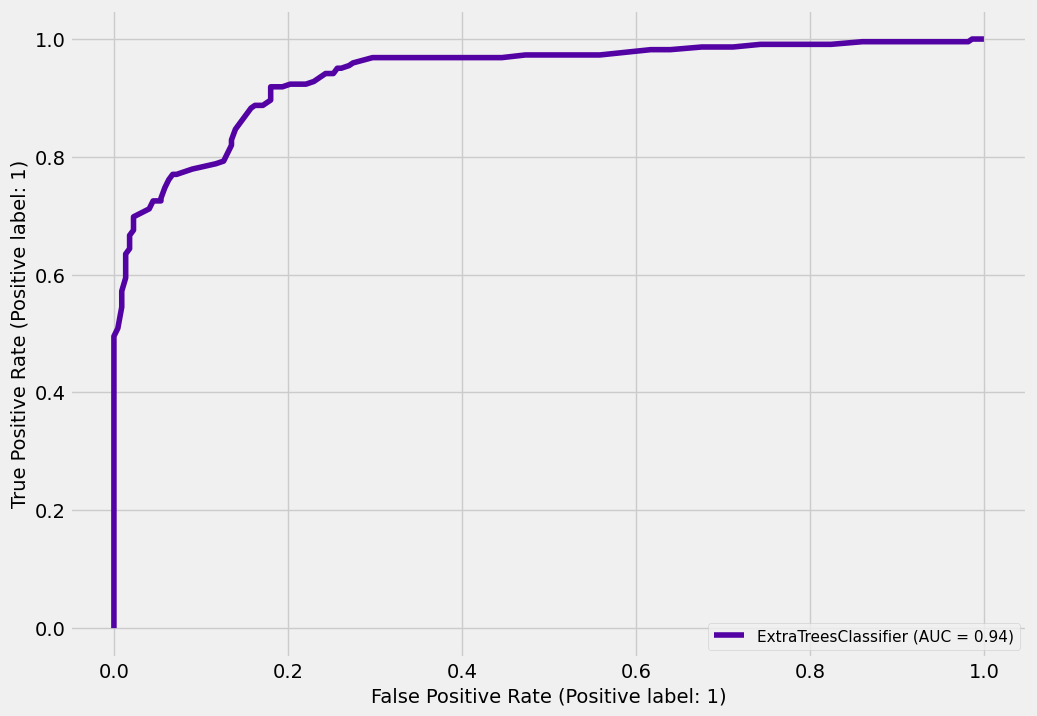

In [62]:
ETC =  ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(ETC,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Checking The Cross validation Score

In [63]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models =[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]


names = ['LR','svc','GNB','dtc','knn','rfc','ETC']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.2f}, {:1f}".format(name,score.mean(),score.std()))


LR    : 0.19, 0.091194
svc    : 0.17, 0.118838
GNB    : 0.24, 0.079816
dtc    : 0.18, 0.046154
knn    : 0.29, 0.032291
rfc    : 0.14, 0.086307
ETC    : 0.13, 0.084867


# Hyper Parameter Tuning (Grid Search CV )

In [64]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [65]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.812 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.807 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.831 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.807 total time=   0.0s
[CV 5

[CV 2/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.773 total time=   0.0s
[CV 3/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 3/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.826 total time=   0.0s
[CV 4/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 4/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.797 total time=   0.0s
[CV 5/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 5/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.778 total time=   0.0s
[CV 1/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, ma

[CV 2/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.812 total time=   0.0s
[CV 3/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.836 total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.826 total time=   0.0s
[CV 5/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 5/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.841 total time=   0.0s
[CV 1/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 1/5; 17/168] END bootstrap=True, criteri

[CV 2/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.807 total time=   0.0s
[CV 3/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.821 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 1/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 24/168] END bootstrap=True, criteri

[CV 2/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.816 total time=   0.0s
[CV 3/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 3/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.855 total time=   0.0s
[CV 4/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 4/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.865 total time=   0.0s
[CV 5/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 5/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.807 total time=   0.0s
[CV 1/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 31/168] END bootstrap=True, criteri

[CV 3/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.850 total time=   0.0s
[CV 4/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.831 total time=   0.0s
[CV 5/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.836 total time=   0.0s
[CV 1/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.832 total time=   0.0s
[CV 2/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 2/5; 38/168] END bootstrap=True, criteri

[CV 2/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.850 total time=   0.0s
[CV 3/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 3/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.855 total time=   0.0s
[CV 4/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 4/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.855 total time=   0.0s
[CV 5/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 5/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.836 total time=   0.0s
[CV 1/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 1/5; 46/168] END bootstrap=True, criteri

[CV 2/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.850 total time=   0.0s
[CV 3/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 3/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.879 total time=   0.0s
[CV 4/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 4/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.845 total time=   0.0s
[CV 5/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 5/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.836 total time=   0.0s
[CV 1/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 1/5; 53/168] END bootstrap=True, criteri

[CV 4/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.865 total time=   0.0s
[CV 5/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 5/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.855 total time=   0.0s
[CV 1/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 1/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.861 total time=   0.0s
[CV 2/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 2/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.841 total time=   0.0s
[CV 3/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 3/5; 60/168] END bootstrap=True, criteri

[CV 1/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.856 total time=   0.0s
[CV 2/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 2/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.845 total time=   0.0s
[CV 3/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.870 total time=   0.0s
[CV 4/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.879 total time=   0.0s
[CV 5/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 67/168] END bootstrap=True, criteri

[CV 3/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.860 total time=   0.0s
[CV 4/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.831 total time=   0.0s
[CV 5/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.836 total time=   0.0s
[CV 1/5; 75/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 75/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.827 total time=   0.0s
[CV 2/5; 75/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50
[CV 2/5; 75/168] END bootstrap=True, criteri

[CV 5/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.845 total time=   0.0s
[CV 1/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.856 total time=   0.1s
[CV 2/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 2/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.845 total time=   0.0s
[CV 3/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 3/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.874 total time=   0.0s
[CV 4/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 4/5; 82/168] END bootstrap=True, criteri

[CV 1/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 2/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.783 total time=   0.0s
[CV 3/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 3/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.889 total time=   0.1s
[CV 4/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 4/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.845 total time=   0.0s
[CV 5/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 5/5; 89/168] END bootstr

[CV 5/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.821 total time=   0.0s
[CV 1/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 1/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.841 total time=   0.1s
[CV 2/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 2/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.821 total time=   0.1s
[CV 3/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 3/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.879 total time=   0.1s
[CV 4/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 4/5; 96/168] END bootstr

[CV 4/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.850 total time=   0.0s
[CV 5/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 5/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.821 total time=   0.0s
[CV 1/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 1/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.875 total time=   0.1s
[CV 2/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 2/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.841 total time=   0.1s
[CV 3/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 3/5; 103

[CV 4/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.850 total time=   0.0s
[CV 5/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 5/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.860 total time=   0.0s
[CV 1/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 1/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.861 total time=   0.1s
[CV 2/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 2/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 3/5; 110

[CV 4/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.874 total time=   0.0s
[CV 5/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 5/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.831 total time=   0.0s
[CV 1/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 1/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.851 total time=   0.2s
[CV 2/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 2/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.831 total time=   0.1s
[CV 3/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 3/5; 117

[CV 5/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.836 total time=   0.0s
[CV 1/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 1/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.861 total time=   0.1s
[CV 2/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 2/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.879 total time=   0.1s
[CV 3/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 3/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.879 total time=   0.1s
[CV 4/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 4/5; 124

[CV 4/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.865 total time=   0.0s
[CV 5/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 5/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.860 total time=   0.0s
[CV 1/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 1/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=0.841 total time=   0.1s
[CV 2/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 2/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=0.841 total time=   0.1s
[CV 3/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 3/5; 131

[CV 5/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.850 total time=   0.0s
[CV 1/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 1/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.856 total time=   0.1s
[CV 2/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 2/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.841 total time=   0.1s
[CV 3/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 3/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.903 total time=   0.1s
[CV 4/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 4/5; 138

[CV 4/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.860 total time=   0.0s
[CV 5/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 5/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.860 total time=   0.0s
[CV 1/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 1/5; 145/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50;, score=0.856 total time=   0.1s
[CV 2/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 2/5; 145/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50;, score=0.841 total time=   0.1s
[CV 3/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 3/5; 145

[CV 5/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.865 total time=   0.0s
[CV 1/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 1/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.851 total time=   0.0s
[CV 2/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 2/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.855 total time=   0.1s
[CV 3/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 3/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.879 total time=   0.1s
[CV 4/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 4/5; 152

[CV 4/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.860 total time=   0.0s
[CV 5/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.850 total time=   0.0s
[CV 1/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 2/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=0.845 total time=   0.1s
[CV 3/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 3/5; 159

[CV 3/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.874 total time=   0.0s
[CV 4/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.865 total time=   0.0s
[CV 5/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.860 total time=   0.0s
[CV 1/5; 166/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 166/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.865 total time=   0.1s
[CV 2/5; 166/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 2/5; 166

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [66]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 60}

# Final Model

In [67]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 60, max_depth=50 ,max_features='auto')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.8558558558558559


In [68]:

import joblib
joblib.dump(Final_mod,'Insurance Claim Fraud.pkl')

['Insurance Claim Fraud.pkl']